In [11]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
%matplotlib inline
sns.set_style("darkgrid")


In [12]:
#Reading the data from csv.file
crimes_data = pd.read_csv('/content/Crimes_-_2001_to_Present_20250805.csv')

In [13]:
#Checking the data contents
crimes_data.head()

ID Case Number                    Date                 Block  IUCR  \
0  11938228    JD100017  12/31/2019 11:55:00 PM       0000X W 69TH ST  143A   
1  11940078    JD100016  12/31/2019 11:54:00 PM        063XX S MAY ST  0420   
2  11938857    JD100599  12/31/2019 11:50:00 PM   004XX N Ashland ave  0820   
3  11938240    JD100002  12/31/2019 11:48:00 PM    004XX S CICERO AVE  143A   
4  11937967    JC567053  12/31/2019 11:46:00 PM  034XX W JACKSON BLVD  143A   

        Primary Type                     Description    Location Description  \
0  WEAPONS VIOLATION        UNLAWFUL POSS OF HANDGUN                  STREET   
1            BATTERY  AGGRAVATED:KNIFE/CUTTING INSTR                SIDEWALK   
2              THEFT                  $500 AND UNDER           BAR OR TAVERN   
3  WEAPONS VIOLATION        UNLAWFUL POSS OF HANDGUN  VEHICLE NON-COMMERCIAL   
4  WEAPONS VIOLATION        UNLAWFUL POSS OF HANDGUN                  STREET   

   Arrest  Domestic  ...  Ward  Community Area  FBI Code  X Coordinate  \
0    True     False  ...   6.0            69.0        15     1176896.0   
1   False     False  ...  16.0            68.0       04B     1169736.0   
2   False     False  ...  27.0            24.0        06           NaN   
3    True     False  ...  29.0            25.0        15     1144466.0   
4   False     False  ...  28.0            27.0        15     1153587.0   

  Y Coordinate  Year              Updated On   Latitude  Longitude  \
0    1859260.0  2019  01/07/2020 06:57:13 PM  41.769150 -87.627137   
1    1862855.0  2019  01/08/2020 03:45:22 PM  41.779174 -87.653278   
2          NaN  2019  01/07/2020 06:57:13 PM        NaN        NaN   
3    1897452.0  2019  01/07/2020 06:57:13 PM  41.874624 -87.745053   
4    1898480.0  2019  01/07/2020 06:57:13 PM  41.877268 -87.711537   

                        Location  
0  (41.769150218, -87.627136786)  
1  (41.779173667, -87.653277703)  
2                            NaN  
3  (41.874623951, -87.745052647)  
4  (41.877268465, -87.711536692)  

[5 rows x 22 columns]

In [14]:
#Handling any inconsistensis of column names
crimes_data.columns = crimes_data.columns.str.strip()
crimes_data.columns = crimes_data.columns.str.replace(',', '')
crimes_data.columns = crimes_data.columns.str.replace(' ', '_')
crimes_data.columns = crimes_data.columns.str.lower()

In [15]:
#Checking the data for any null values and its datatypes
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530766 entries, 0 to 530765
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    530766 non-null  int64  
 1   case_number           530766 non-null  object 
 2   date                  530766 non-null  object 
 3   block                 530766 non-null  object 
 4   iucr                  530766 non-null  object 
 5   primary_type          530766 non-null  object 
 6   description           530766 non-null  object 
 7   location_description  528275 non-null  object 
 8   arrest                530766 non-null  bool   
 9   domestic              530766 non-null  bool   
 10  beat                  530766 non-null  int64  
 11  district              530766 non-null  int64  
 12  ward                  530747 non-null  float64
 13  community_area        530731 non-null  float64
 14  fbi_code              530766 non-null  object 
 15  

In [16]:
#Check the data forany duplicates
crimes_data[crimes_data.duplicated(keep=False)]

Empty DataFrame
Columns: [id, case_number, date, block, iucr, primary_type, description, location_description, arrest, domestic, beat, district, ward, community_area, fbi_code, x_coordinate, y_coordinate, year, updated_on, latitude, longitude, location]
Index: []

[0 rows x 22 columns]

In [17]:
# Removing Primary key type attriburtes as they of no use for any type of analysis, Location columns is just a
# combination of Latitude and Longitude
crimes_data.drop(['id','case_number','location'],axis=1,inplace=True)

<Axes: >

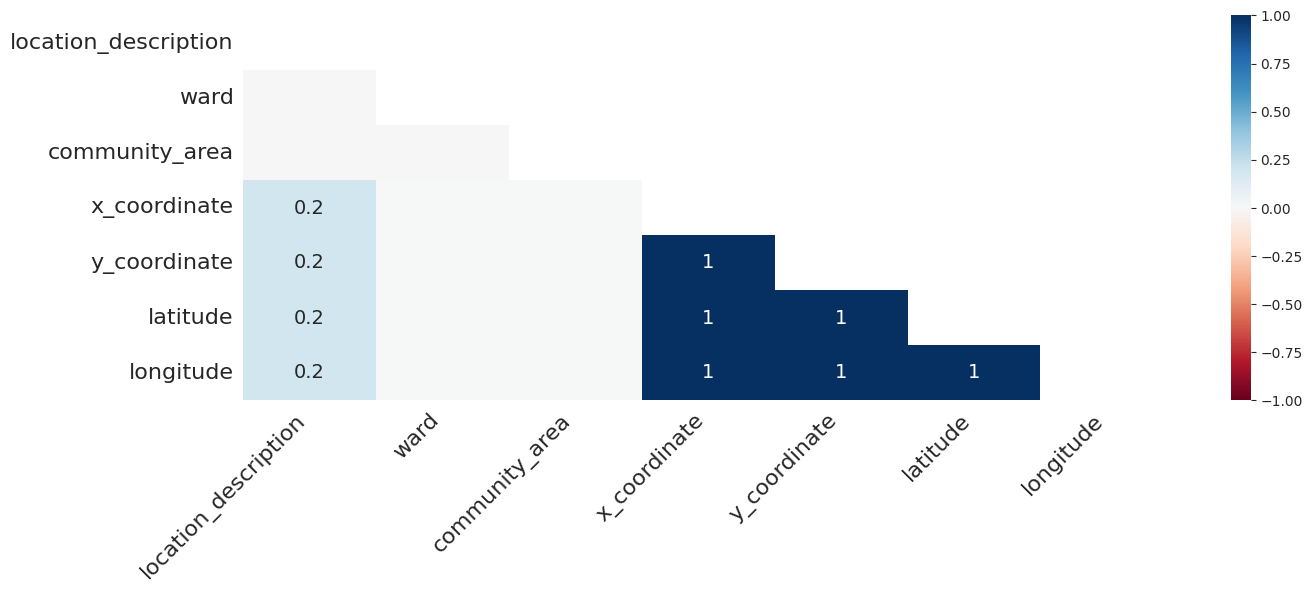

In [18]:
msno.heatmap(crimes_data,figsize=(15, 5))

<Axes: >

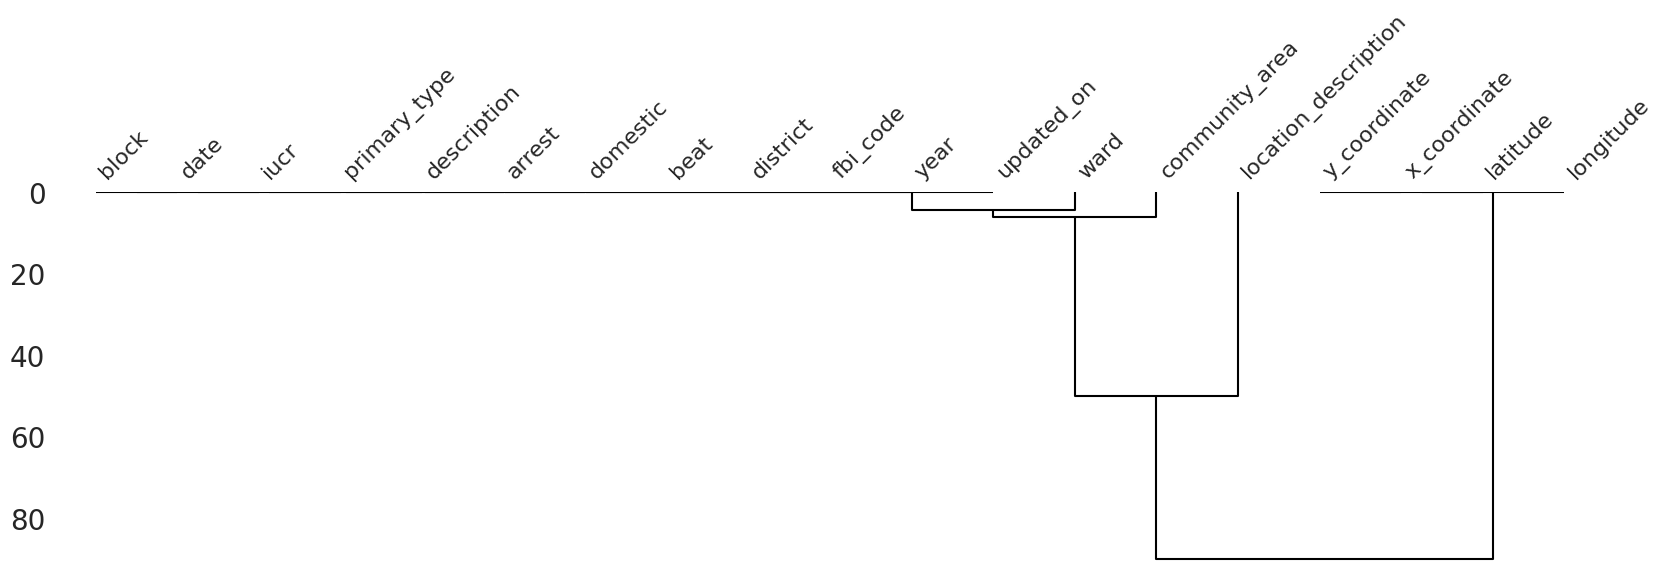

In [19]:
msno.dendrogram(crimes_data,figsize=(20,5))

As we can see from the above heatmap and dendogram that, the null values of latitude and longitude are highly co-ordinated with the x_coordinate and y_coordianate values respectively. A a co-relation of 1 here indicates that if any one of the value is missing the other one is also missing.

So we can safely remove observations where one of the values is zero. This should'nt affect our data and also limit the dropping of important observations.

In [20]:
crimes_data.isnull().sum()

date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description    2491
arrest                     0
domestic                   0
beat                       0
district                   0
ward                      19
community_area            35
fbi_code                   0
x_coordinate            8035
y_coordinate            8035
year                       0
updated_on                 0
latitude                8035
longitude               8035
dtype: int64

In [21]:
#Dropping observations where latitude is null/Nan
crimes_data.dropna(subset=['latitude'],inplace=True)
crimes_data.reset_index(drop=True,inplace=True)

There are some data with ward and commnity_area missing, since they are very few in number we can go ahead and delete it

In [22]:
crimes_data.isnull().sum()

date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description    1622
arrest                     0
domestic                   0
beat                       0
district                   0
ward                      18
community_area            34
fbi_code                   0
x_coordinate               0
y_coordinate               0
year                       0
updated_on                 0
latitude                   0
longitude                  0
dtype: int64

In [23]:
crimes_data.dropna(inplace=True)
crimes_data.reset_index(drop=True,inplace=True)

In [24]:
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521057 entries, 0 to 521056
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  521057 non-null  object 
 1   block                 521057 non-null  object 
 2   iucr                  521057 non-null  object 
 3   primary_type          521057 non-null  object 
 4   description           521057 non-null  object 
 5   location_description  521057 non-null  object 
 6   arrest                521057 non-null  bool   
 7   domestic              521057 non-null  bool   
 8   beat                  521057 non-null  int64  
 9   district              521057 non-null  int64  
 10  ward                  521057 non-null  float64
 11  community_area        521057 non-null  float64
 12  fbi_code              521057 non-null  object 
 13  x_coordinate          521057 non-null  float64
 14  y_coordinate          521057 non-null  float64
 15  

We ended up removing up around 9,709 rows out of the 530766 rows, there are very low chances that we missed important observations. After handling all the NULL entries we ended up with a dataset of size 521057. Which is still a better value for our analysis

In [25]:
#Converting the data column to datetime object so we can get better results of our analysis
#Get the day of the week,month and time of the crimes
crimes_data.date = pd.to_datetime(crimes_data.date)
crimes_data['day_of_week'] = crimes_data.date.dt.day_name()
crimes_data['month'] = crimes_data.date.dt.month_name()
crimes_data['time'] = crimes_data.date.dt.hour

/tmp/ipython-input-2833103265.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes_data.date = pd.to_datetime(crimes_data.date)


In [26]:
#Mapping similar crimes under one group.
primary_type_map = {
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL_ASSAULT',
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION') : 'SEXUAL_OFFENSE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS_OFFENSE',
    ('HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS') : 'CRIMINAL_OFFENSE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN_TRAFFICKING_OFFENSE',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTIC_OFFENSE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER_OFFENSE'
}
primary_type_mapping = {}
for keys, values in primary_type_map.items():
    for key in keys:
        primary_type_mapping[key] = values
crimes_data['primary_type_grouped'] = crimes_data.primary_type.map(primary_type_mapping)

In [27]:
#Zone where the crime has occured
zone_mapping = {
    'N' : 'North',
    'S' : 'South',
    'E' : 'East',
    'W' : 'West'
}
crimes_data['zone'] = crimes_data.block.str.split(" ", n = 2, expand = True)[1].map(zone_mapping)

In [28]:
#Mapping seasons from month of crime
season_map = {
    ('March','April','May') : 'Spring',
    ('June','July','August') : 'Summer',
    ('September','October','November') : 'Fall',
    ('December','January','February') : 'Winter'
}
season_mapping = {}
for keys, values in season_map.items():
    for key in keys:
        season_mapping[key] = values
crimes_data['season'] = crimes_data.month.map(season_mapping)

In [29]:
#Mapping similar locations of crime under one group.
loc_map = {
    ('RESIDENCE', 'APARTMENT', 'CHA APARTMENT', 'RESIDENCE PORCH/HALLWAY', 'RESIDENCE-GARAGE',
    'RESIDENTIAL YARD (FRONT/BACK)', 'DRIVEWAY - RESIDENTIAL', 'HOUSE') : 'RESIDENCE',

    ('BARBERSHOP', 'COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', 'DEPARTMENT STORE', 'RESTAURANT',
    'ATHLETIC CLUB', 'TAVERN/LIQUOR STORE', 'SMALL RETAIL STORE', 'HOTEL/MOTEL', 'GAS STATION',
    'AUTO / BOAT / RV DEALERSHIP', 'CONVENIENCE STORE', 'BANK', 'BAR OR TAVERN', 'DRUG STORE',
    'GROCERY FOOD STORE', 'CAR WASH', 'SPORTS ARENA/STADIUM', 'DAY CARE CENTER', 'MOVIE HOUSE/THEATER',
    'APPLIANCE STORE', 'CLEANING STORE', 'PAWN SHOP', 'FACTORY/MANUFACTURING BUILDING', 'ANIMAL HOSPITAL',
    'BOWLING ALLEY', 'SAVINGS AND LOAN', 'CREDIT UNION', 'KENNEL', 'GARAGE/AUTO REPAIR', 'LIQUOR STORE',
    'GAS STATION DRIVE/PROP.', 'OFFICE', 'BARBER SHOP/BEAUTY SALON') : 'BUSINESS',

    ('VEHICLE NON-COMMERCIAL', 'AUTO', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'TAXICAB',
    'VEHICLE-COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', 'VEHICLE-COMMERCIAL - TROLLEY BUS',
    'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS') : 'VEHICLE',

    ('AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'CTA PLATFORM', 'CTA STATION', 'CTA BUS STOP',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'CTA TRAIN', 'CTA BUS', 'CTA GARAGE / OTHER PROPERTY',
    'OTHER RAILROAD PROP / TRAIN DEPOT', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRCRAFT',
    'AIRPORT PARKING LOT', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'OTHER COMMERCIAL TRANSPORTATION',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT VENDING ESTABLISHMENT',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT TRANSPORTATION SYSTEM (ATS)',
    'CTA TRACKS - RIGHT OF WAY', 'AIRPORT/AIRCRAFT', 'BOAT/WATERCRAFT', 'CTA PROPERTY', 'CTA "L" PLATFORM',
    'RAILROAD PROPERTY') : 'PUBLIC_TRANSPORTATION',

    ('HOSPITAL BUILDING/GROUNDS', 'NURSING HOME/RETIREMENT HOME', 'SCHOOL, PUBLIC, BUILDING',
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL, PRIVATE, BUILDING',
    'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'YMCA', 'HOSPITAL') : 'PUBLIC_BUILDING',

    ('STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'PARK PROPERTY', 'ALLEY', 'CEMETARY',
    'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT/GROUNDS', 'COLLEGE/UNIVERSITY GROUNDS', 'BRIDGE',
    'SCHOOL, PRIVATE, GROUNDS', 'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'PARKING LOT', 'DRIVEWAY',
    'HALLWAY', 'YARD', 'CHA GROUNDS', 'RIVER BANK', 'STAIRWELL', 'CHA PARKING LOT') : 'PUBLIC_AREA',

    ('POLICE FACILITY/VEH PARKING LOT', 'GOVERNMENT BUILDING/PROPERTY', 'FEDERAL BUILDING', 'JAIL / LOCK-UP FACILITY',
    'FIRE STATION', 'GOVERNMENT BUILDING') : 'GOVERNMENT',

    ('OTHER', 'ABANDONED BUILDING', 'WAREHOUSE', 'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
    'CONSTRUCTION SITE', 'POOL ROOM', 'NEWSSTAND', 'HIGHWAY/EXPRESSWAY', 'COIN OPERATED MACHINE', 'HORSE STABLE',
    'FARM', 'GARAGE', 'WOODED AREA', 'GANGWAY', 'TRAILER', 'BASEMENT', 'CHA PLAY LOT') : 'OTHER'
}

loc_mapping = {}
for keys, values in loc_map.items():
    for key in keys:
        loc_mapping[key] = values
crimes_data['loc_grouped'] = crimes_data.location_description.map(loc_mapping)

In [30]:
#Mapping crimes to ints to get better information from plots
crimes_data.arrest = crimes_data.arrest.astype(int)
crimes_data.domestic = crimes_data.domestic.astype(int)

In [31]:
#Grouping the data into years = (2018 and 2019) for analyzing
crimes_data_2018 = crimes_data[crimes_data.year == 2018]
crimes_data_2019 = crimes_data[crimes_data.year == 2019]

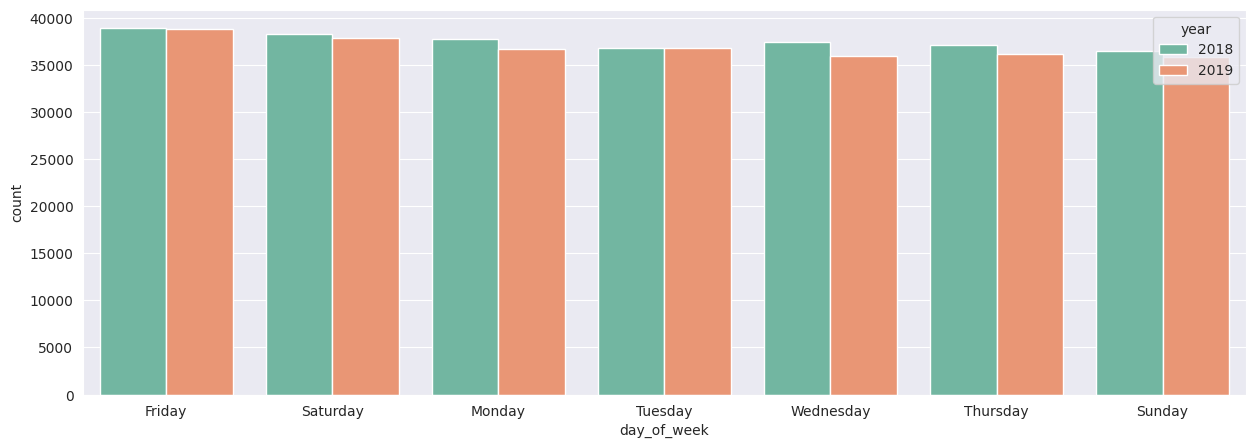

In [32]:
plt.figure(figsize=(15,5))
zone_plot = sns.countplot(data=crimes_data,x='day_of_week',hue='year',order=crimes_data.day_of_week.value_counts().index,palette='Set2')

From the above plot we can see that the day of the week has very little influence on the crime, it seems like almost everyday the crimes count were the same.
But when it comes to 2018 and 2019 we can see that the number of crimes are less in 2019 than in 2018

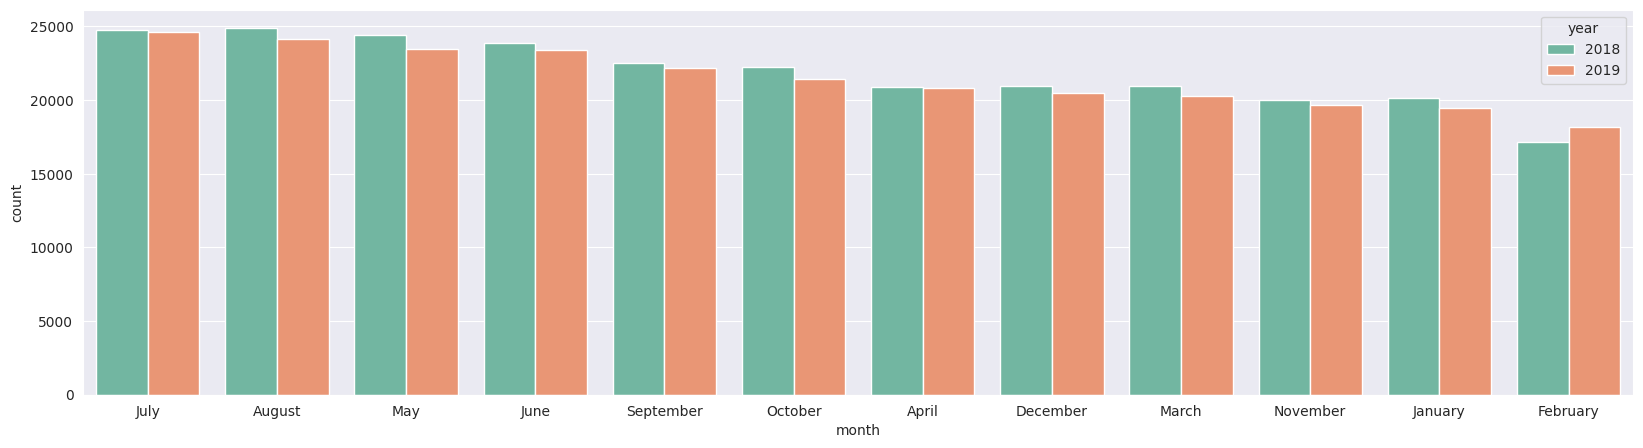

In [33]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=crimes_data,x='month',hue='year',order=crimes_data.month.value_counts().index,palette='Set2')

From the above plot we can see that May, June, July and August are the months were there are huge crime rates.
During February,January and November the crimes are less compared. It looks like the crime rate were low in winter's where people hardly come out of the houses.

<Axes: xlabel='time'>

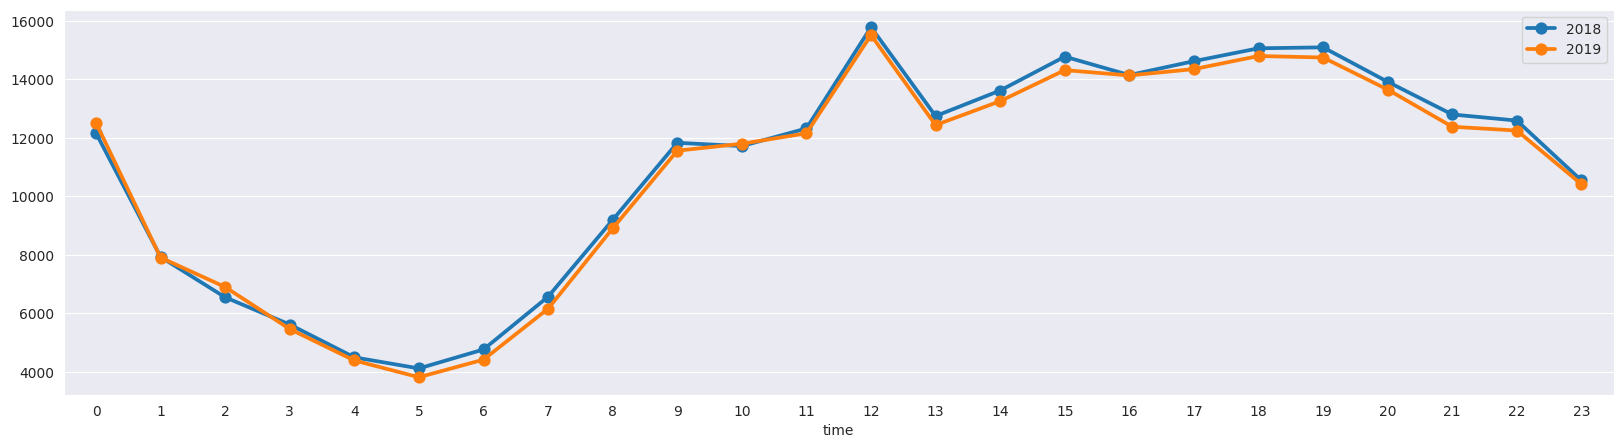

In [39]:
plt.figure(figsize = (20,5))
sns.pointplot(x=time_counts_2018.index, y=time_counts_2018.values, label='2018')
sns.pointplot(x=time_counts_2019.index, y=time_counts_2019.values, label='2019')

The above plot gives the comparison for crimes that happened by hour of the day for the year 2018 and 2019. Both curves follow a similar trend. Around midnight we can see there are a lot of crimes happening and it decreses gradually. There is a spike at 12 in the morning. We need to analyze more looking at the data as to why its happening. The crimes are also more around the evening.

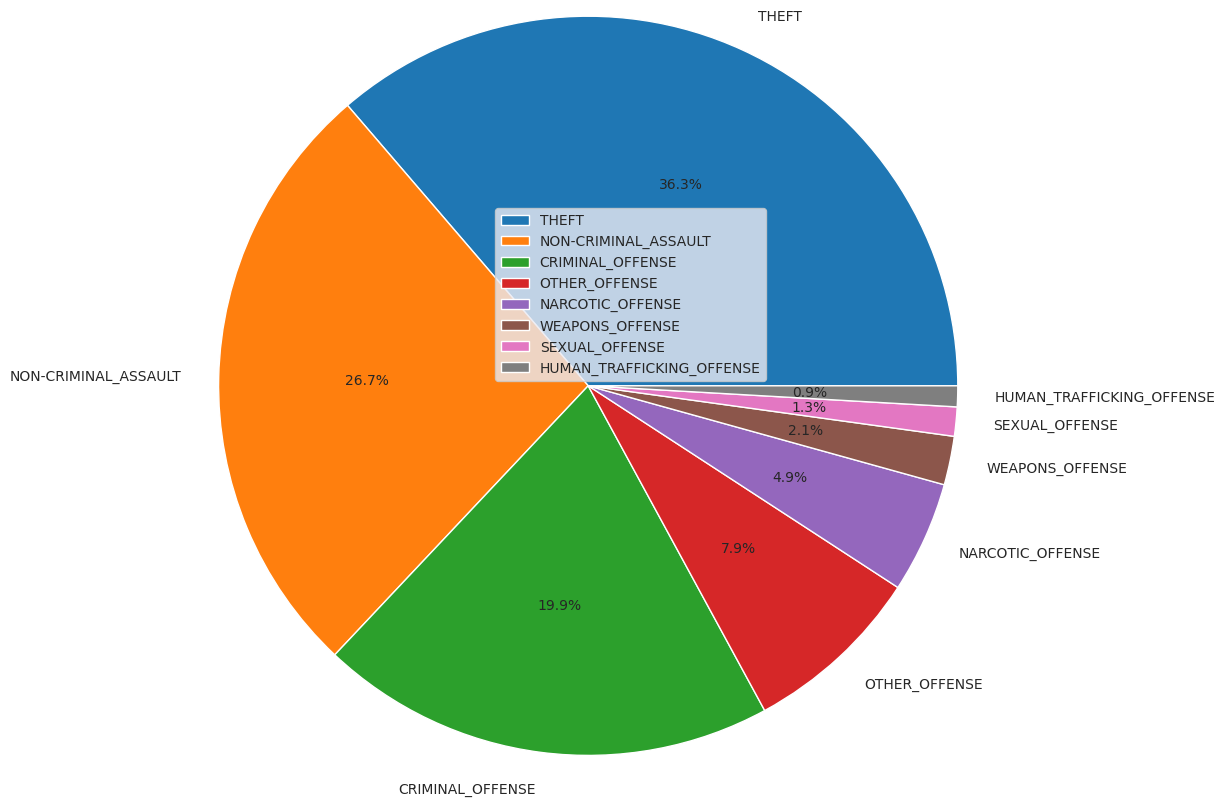

In [40]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2018.primary_type_grouped.value_counts(),labels=crimes_data_2018.primary_type_grouped.value_counts().index,autopct='%1.1f%%',radius=2.5)
plt.legend(loc = 'best')

By looking at the pie charts, we can see that there are a lot of Thefts and Non- Criminal Assault that happeened in the year 2018, there were very less sexual and human traficking offence.
Theft and Non-Criminal Offence consitituted about 60% of the offence's

There is a same trend in the year 2019 as well, but the Thefts were a bit reduced but the count of the Non-Criminal Offence went up

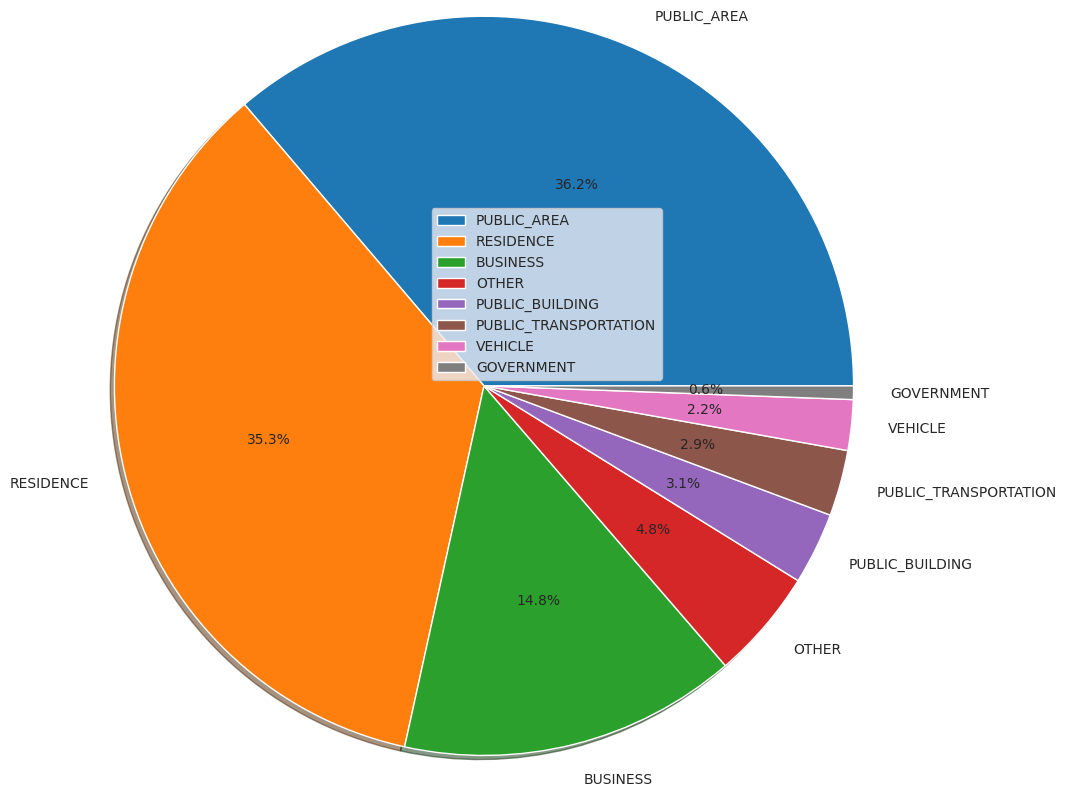

In [41]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2018.loc_grouped.value_counts(),labels=crimes_data_2018.loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

From the above plot we can see that a lot of crimes happenen in pulic places and residence.Almost 70% of the incidents happened in these places.
Public transportation and Government places had very less crimes, so we can deploy more forces in resedential areas to reduce the crime rate.

The below plot of the year 2019 shows a same trend as in 2018

/tmp/ipython-input-2969356451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  primary_type_plot_2018 = sns.barplot(x=crimes_data_2018.primary_type.value_counts()[0:23].index,y=crimes_data_2018.primary_type.value_counts()[0:23].values,palette='Set2')
/tmp/ipython-input-2969356451.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  primary_type_plot_2019 = sns.barplot(x=crimes_data_2019.primary_type.value_counts()[0:23].index,y=crimes_data_2019.primary_type.value_counts()[0:23].values,palette='Set2')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'THEFT'),
  Text(1, 0, 'BATTERY'),
  Text(2, 0, 'CRIMINAL DAMAGE'),
  Text(3, 0, 'ASSAULT'),
  Text(4, 0, 'DECEPTIVE PRACTICE'),
  Text(5, 0, 'OTHER OFFENSE'),
  Text(6, 0, 'NARCOTICS'),
  Text(7, 0, 'BURGLARY'),
  Text(8, 0, 'MOTOR VEHICLE THEFT'),
  Text(9, 0, 'ROBBERY'),
  Text(10, 0, 'CRIMINAL TRESPASS'),
  Text(11, 0, 'WEAPONS VIOLATION'),
  Text(12, 0, 'OFFENSE INVOLVING CHILDREN'),
  Text(13, 0, 'INTERFERENCE WITH PUBLIC OFFICER'),
  Text(14, 0, 'PUBLIC PEACE VIOLATION'),
  Text(15, 0, 'SEX OFFENSE'),
  Text(16, 0, 'CRIM SEXUAL ASSAULT'),
  Text(17, 0, 'CRIMINAL SEXUAL ASSAULT'),
  Text(18, 0, 'PROSTITUTION'),
  Text(19, 0, 'HOMICIDE'),
  Text(20, 0, 'ARSON'),
  Text(21, 0, 'LIQUOR LAW VIOLATION'),
  Text(22, 0, 'STALKING')])

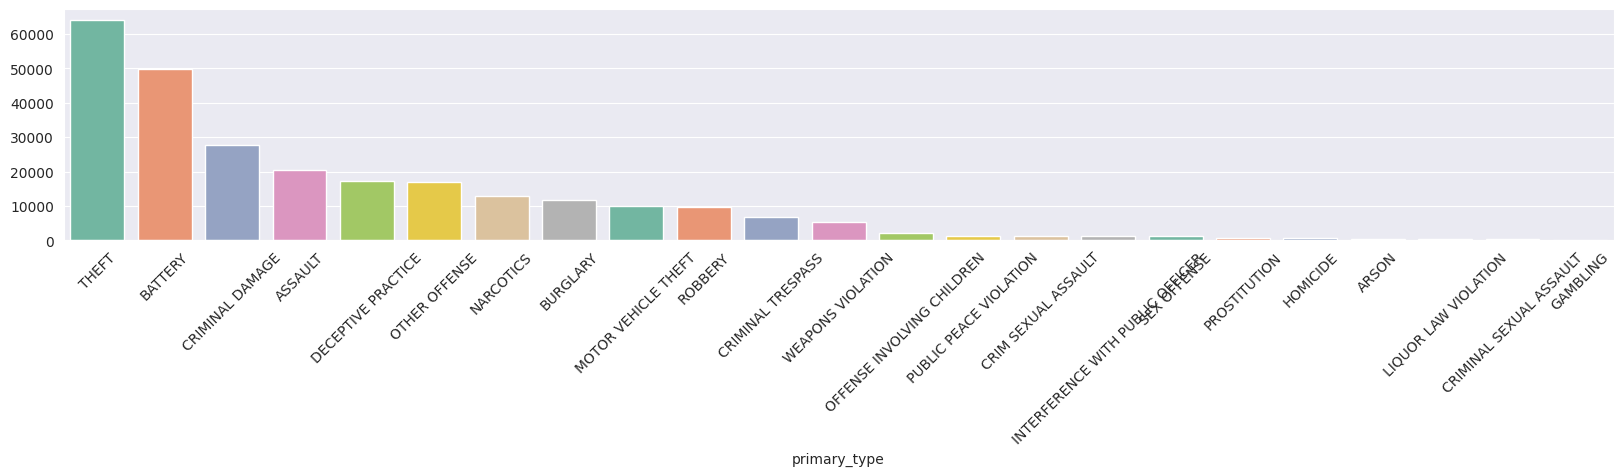

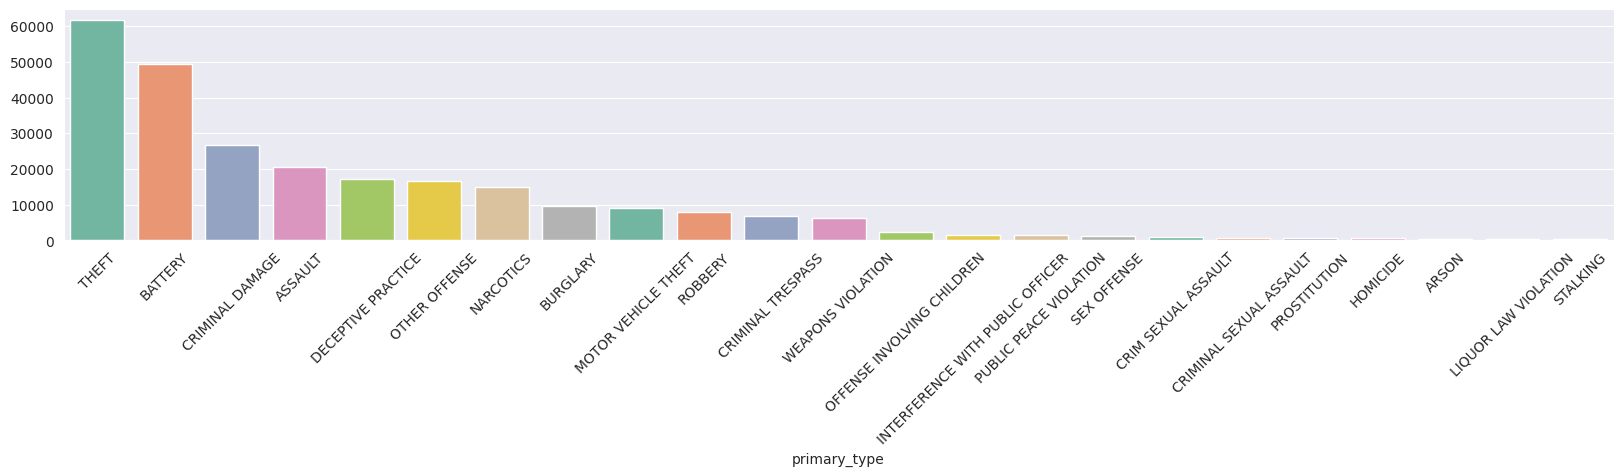

In [47]:
plt.figure(figsize=(20,3))
primary_type_plot_2018 = sns.barplot(x=crimes_data_2018.primary_type.value_counts()[0:23].index,y=crimes_data_2018.primary_type.value_counts()[0:23].values,palette='Set2')
plt.xticks(rotation=45)
plt.figure(figsize=(20,3))
primary_type_plot_2019 = sns.barplot(x=crimes_data_2019.primary_type.value_counts()[0:23].index,y=crimes_data_2019.primary_type.value_counts()[0:23].values,palette='Set2')
plt.xticks(rotation=45)

We see from the above plots that there were a lot of THEFT and BATTERY related crimes that happened over the last two years.

From the below plot we can see that the East side of the city experienced fewer crimes. South Side had the greatest number of crimes.? Reason. Has to be found out. Is it because of the type of citizens? Or are there more beats in the east zone compared to south zone

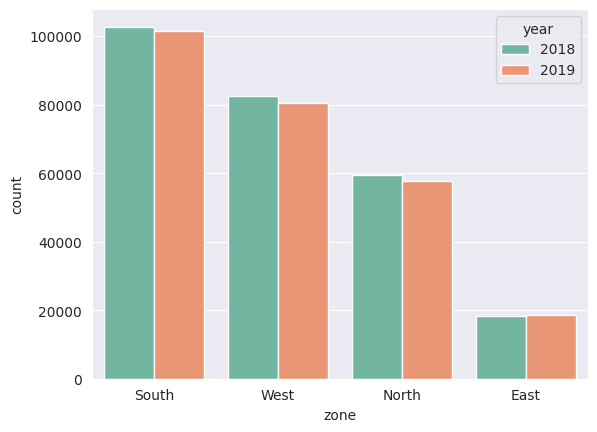

In [48]:
zone_plot = sns.countplot(data=crimes_data,x='zone',hue='year',order=crimes_data.zone.value_counts().index,palette='Set2')

We can see from the below plot that a lot of crimes happening in Summer and Spring, where the weather conditions are favourable. There are very less crimes comparably in Winters

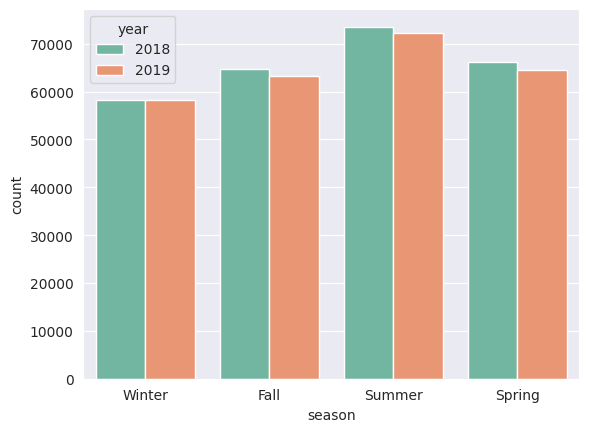

In [49]:
zone_plot = sns.countplot(data=crimes_data,x='season',hue='year',palette='Set2')

As we see from the below plot,there were a lot of criminals who were not arrested for the crime. The same trend has continued for 2019 as well. Almost 75% of the criminals went un-arrested for their crime in 2018.

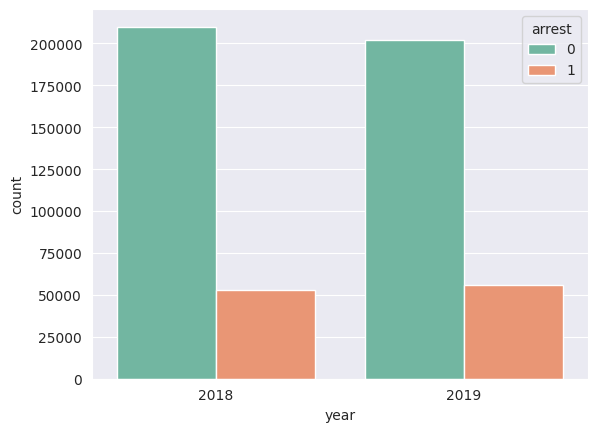

In [50]:
arrest_plot = sns.countplot(data=crimes_data,x='year',hue='arrest',palette='Set2')

/tmp/ipython-input-2219919465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  location_description_plot_2018 = sns.barplot(x=crimes_data_2018.location_description.value_counts()[0:20].index,y=crimes_data_2018.location_description.value_counts()[0:20].values,palette='Set2')
/tmp/ipython-input-2219919465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  location_description_plot_2019 = sns.barplot(x=crimes_data_2019.location_description.value_counts()[0:20].index,y=crimes_data_2019.location_description.value_counts()[0:20].values,palette='Set2')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'STREET'),
  Text(1, 0, 'RESIDENCE'),
  Text(2, 0, 'APARTMENT'),
  Text(3, 0, 'SIDEWALK'),
  Text(4, 0, 'OTHER'),
  Text(5, 0, 'PARKING LOT/GARAGE(NON.RESID.)'),
  Text(6, 0, 'SMALL RETAIL STORE'),
  Text(7, 0, 'RESTAURANT'),
  Text(8, 0, 'ALLEY'),
  Text(9, 0, 'DEPARTMENT STORE'),
  Text(10, 0, 'RESIDENCE PORCH/HALLWAY'),
  Text(11, 0, 'VEHICLE NON-COMMERCIAL'),
  Text(12, 0, 'RESIDENTIAL YARD (FRONT/BACK)'),
  Text(13, 0, 'GAS STATION'),
  Text(14, 0, 'GROCERY FOOD STORE'),
  Text(15, 0, 'RESIDENCE-GARAGE'),
  Text(16, 0, 'SCHOOL, PUBLIC, BUILDING'),
  Text(17, 0, 'BAR OR TAVERN'),
  Text(18, 0, 'CONVENIENCE STORE'),
  Text(19, 0, 'CTA TRAIN')])

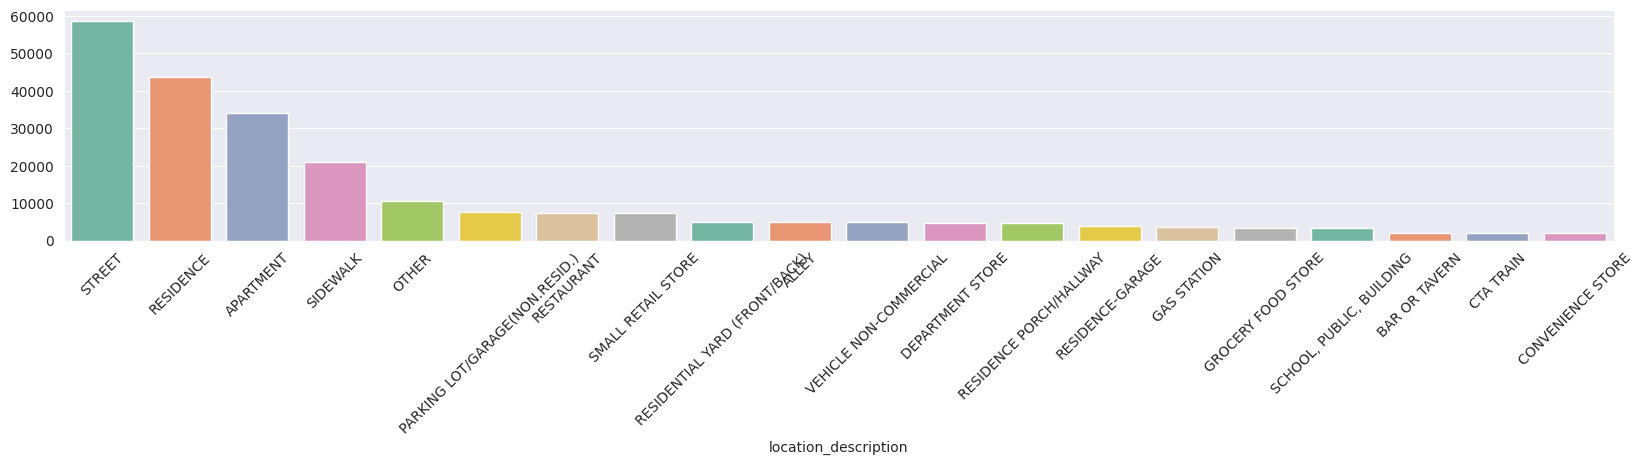

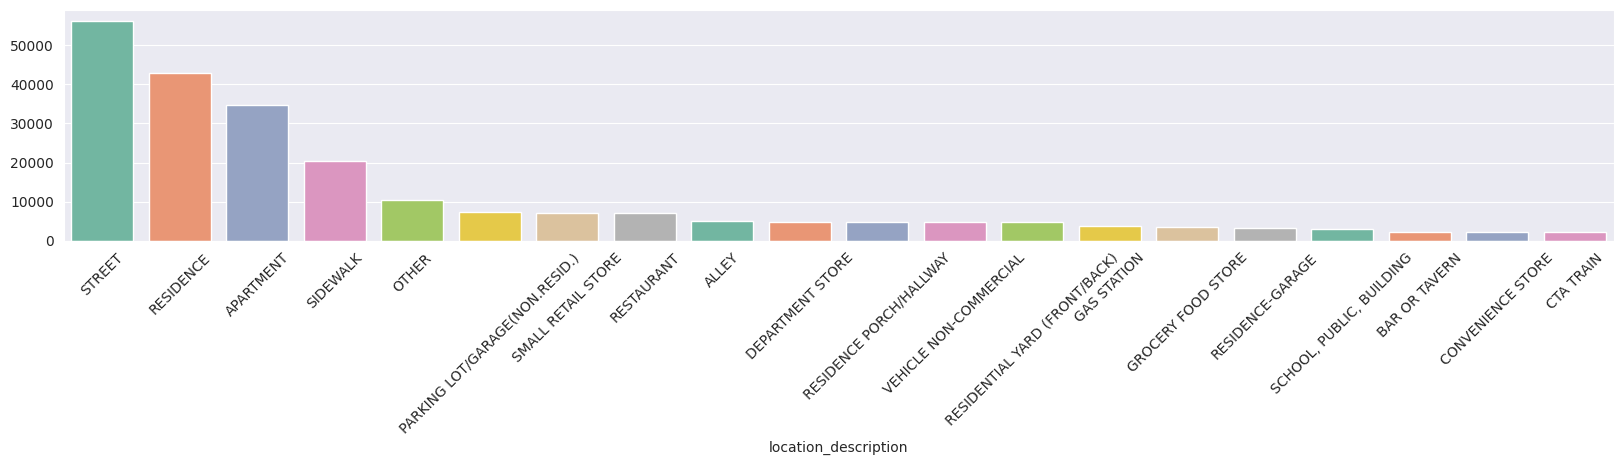

In [54]:
plt.figure(figsize=(20,3))
location_description_plot_2018 = sns.barplot(x=crimes_data_2018.location_description.value_counts()[0:20].index,y=crimes_data_2018.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)
plt.figure(figsize=(20,3))
location_description_plot_2019 = sns.barplot(x=crimes_data_2019.location_description.value_counts()[0:20].index,y=crimes_data_2019.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)

By Looking at the two plots for the years 2018 and 2019 for the location of crime, we can see that the trend continues, A lot of street and Residential crimes are happening in the city. The trend slowly fades out.

# Complete Data

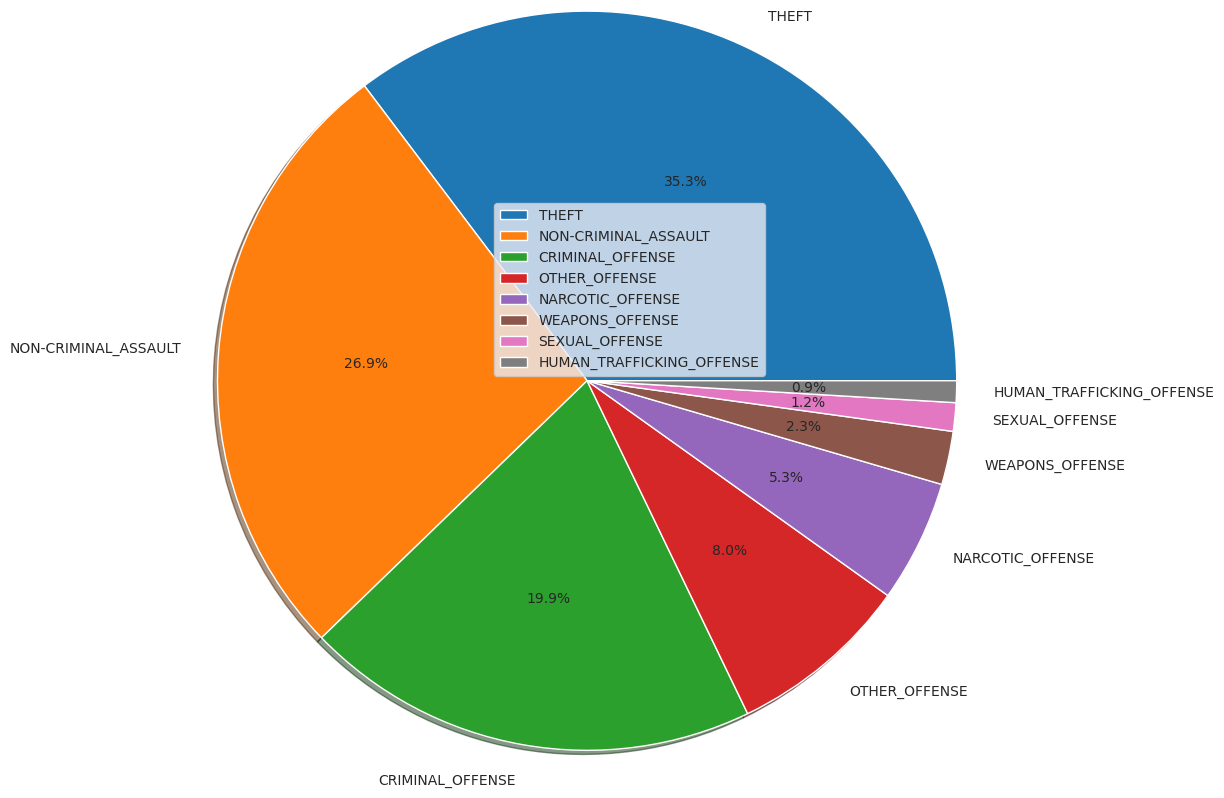

In [55]:
crimes_data_primary_type_pie = plt.pie(crimes_data.primary_type_grouped.value_counts(),labels=crimes_data.primary_type_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

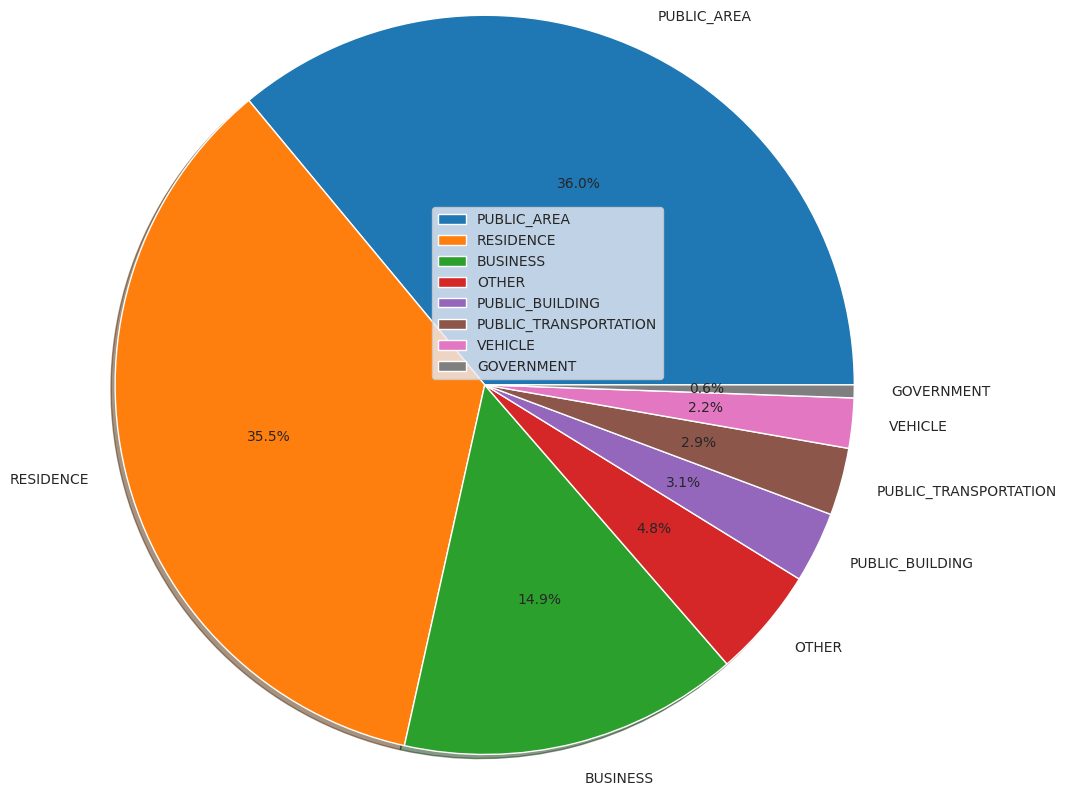

In [56]:
crimes_data_primary_type_pie = plt.pie(crimes_data.loc_grouped.value_counts(),labels=crimes_data.loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

/tmp/ipython-input-3321320498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  zone_plot = sns.countplot(data=crimes_data,x='day_of_week',order=crimes_data.day_of_week.value_counts().index,palette='Set2')


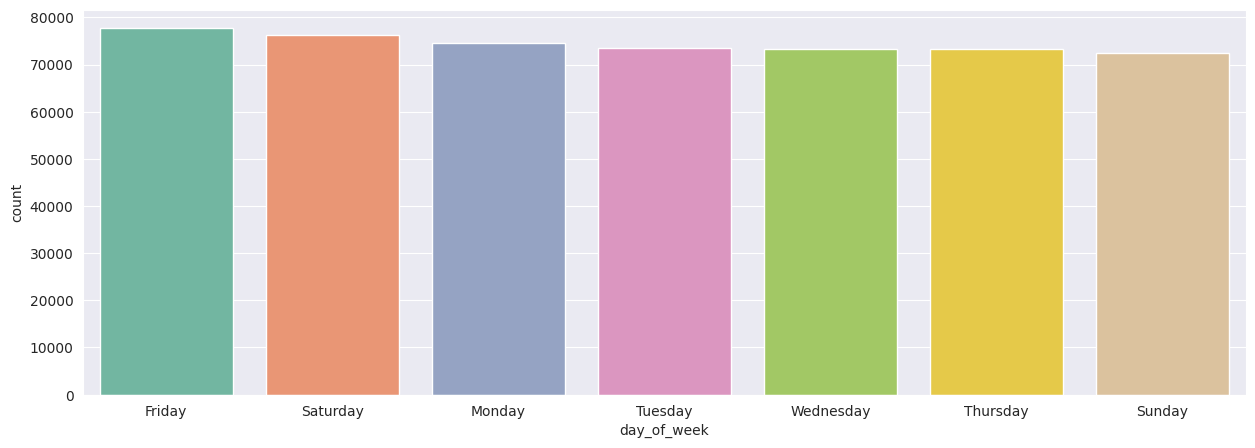

In [57]:
plt.figure(figsize=(15,5))
zone_plot = sns.countplot(data=crimes_data,x='day_of_week',order=crimes_data.day_of_week.value_counts().index,palette='Set2')

/tmp/ipython-input-3715457627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  zone_plot = sns.countplot(data=crimes_data,x='month',order=crimes_data.month.value_counts().index,palette='Set2')


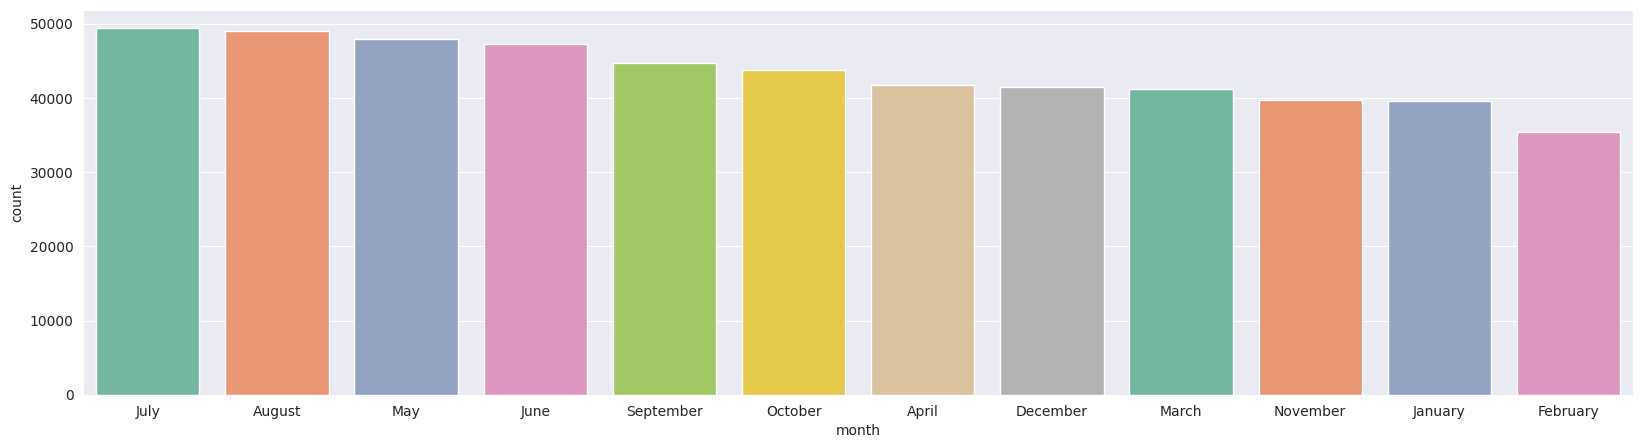

In [58]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=crimes_data,x='month',order=crimes_data.month.value_counts().index,palette='Set2')

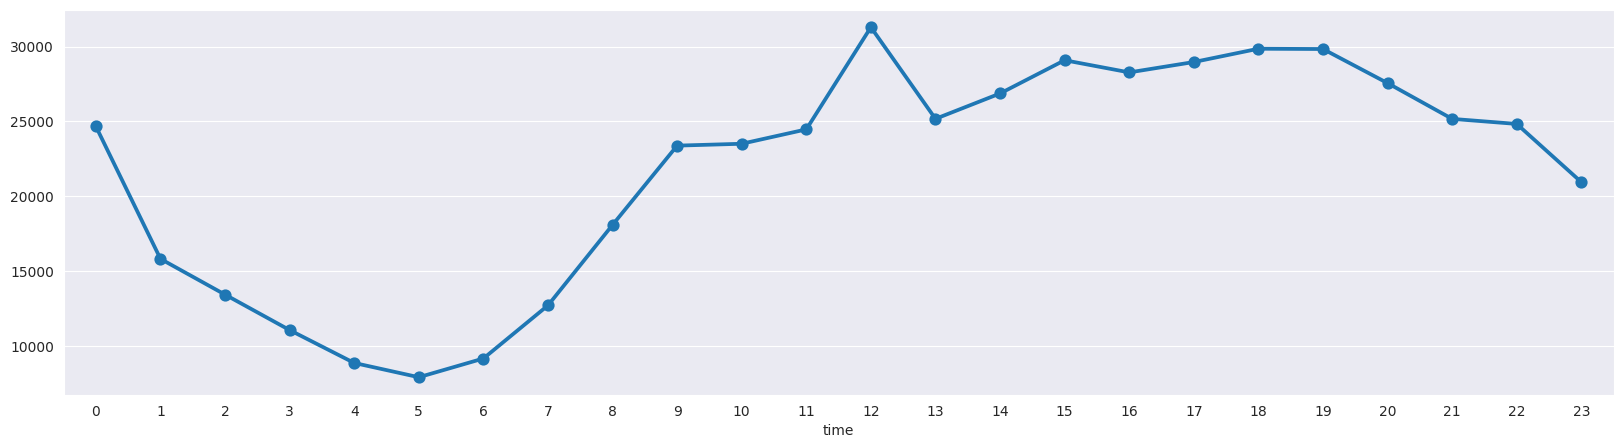

In [60]:
plt.figure(figsize=(20,5))
time_counts = crimes_data.time.value_counts()
zone_plot = sns.pointplot(x=time_counts.index,y=time_counts.values)

/tmp/ipython-input-1493286939.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  zone_plot = sns.countplot(data=crimes_data,x='zone',order=crimes_data.zone.value_counts().index,palette='Set2')


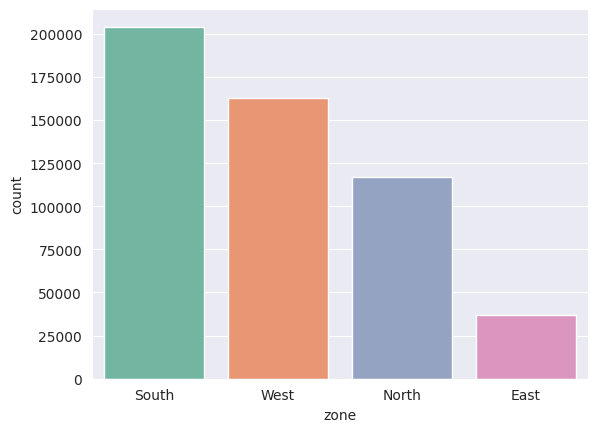

In [61]:
zone_plot = sns.countplot(data=crimes_data,x='zone',order=crimes_data.zone.value_counts().index,palette='Set2')

/tmp/ipython-input-632931073.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  zone_plot = sns.countplot(data=crimes_data,x='season',order=crimes_data.season.value_counts().index,palette='Set2')


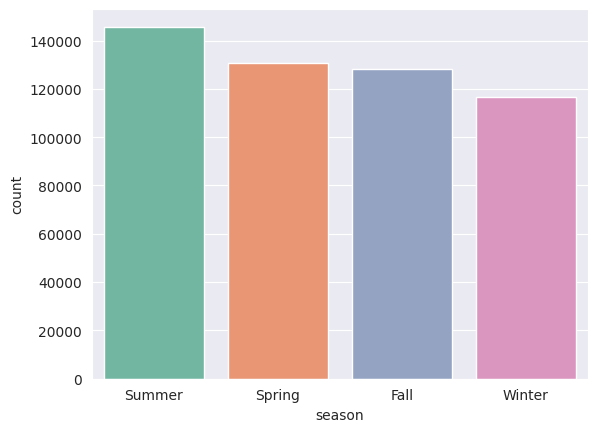

In [62]:
zone_plot = sns.countplot(data=crimes_data,x='season',order=crimes_data.season.value_counts().index,palette='Set2')

/tmp/ipython-input-1741710.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  arrest_plot = sns.countplot(data=crimes_data,x='arrest',palette='Set2')


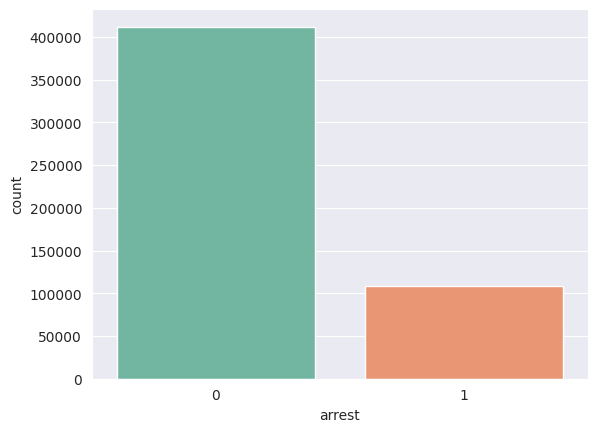

In [63]:
arrest_plot = sns.countplot(data=crimes_data,x='arrest',palette='Set2')

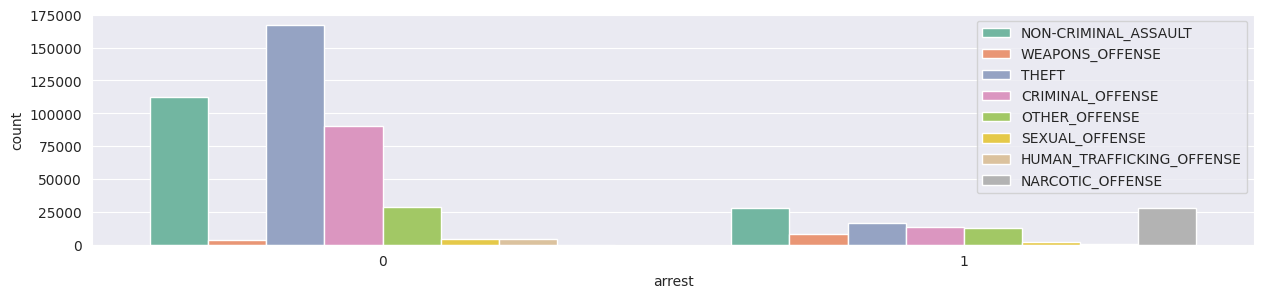

In [64]:
plt.figure(figsize=(15,3))
arrest_plot = sns.countplot(data=crimes_data,x='arrest',hue='primary_type_grouped',palette='Set2')
plt.legend(loc = 'best')

/tmp/ipython-input-3434348824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  location_description_plot = sns.barplot(x=crimes_data.location_description.value_counts()[0:20].index,y=crimes_data.location_description.value_counts()[0:20].values,palette='Set2')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'STREET'),
  Text(1, 0, 'RESIDENCE'),
  Text(2, 0, 'APARTMENT'),
  Text(3, 0, 'SIDEWALK'),
  Text(4, 0, 'OTHER'),
  Text(5, 0, 'PARKING LOT/GARAGE(NON.RESID.)'),
  Text(6, 0, 'SMALL RETAIL STORE'),
  Text(7, 0, 'RESTAURANT'),
  Text(8, 0, 'ALLEY'),
  Text(9, 0, 'RESIDENTIAL YARD (FRONT/BACK)'),
  Text(10, 0, 'VEHICLE NON-COMMERCIAL'),
  Text(11, 0, 'DEPARTMENT STORE'),
  Text(12, 0, 'RESIDENCE PORCH/HALLWAY'),
  Text(13, 0, 'GAS STATION'),
  Text(14, 0, 'RESIDENCE-GARAGE'),
  Text(15, 0, 'GROCERY FOOD STORE'),
  Text(16, 0, 'SCHOOL, PUBLIC, BUILDING'),
  Text(17, 0, 'BAR OR TAVERN'),
  Text(18, 0, 'CONVENIENCE STORE'),
  Text(19, 0, 'CTA TRAIN')])

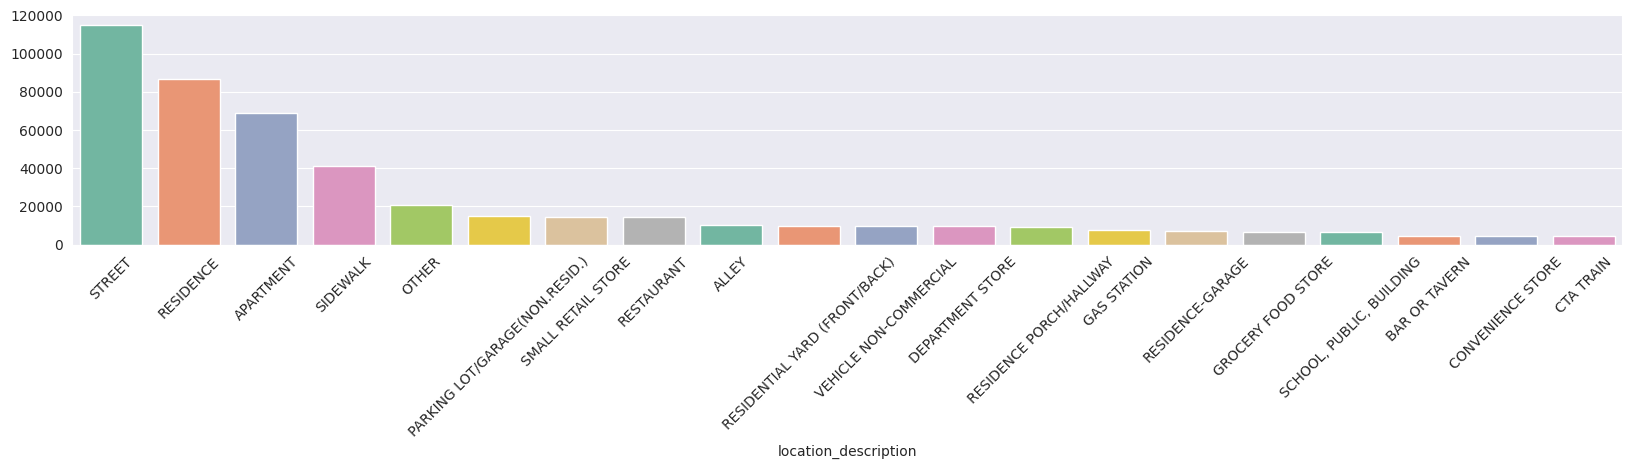

In [66]:
plt.figure(figsize=(20,3))
location_description_plot = sns.barplot(x=crimes_data.location_description.value_counts()[0:20].index,y=crimes_data.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Crimes by District')

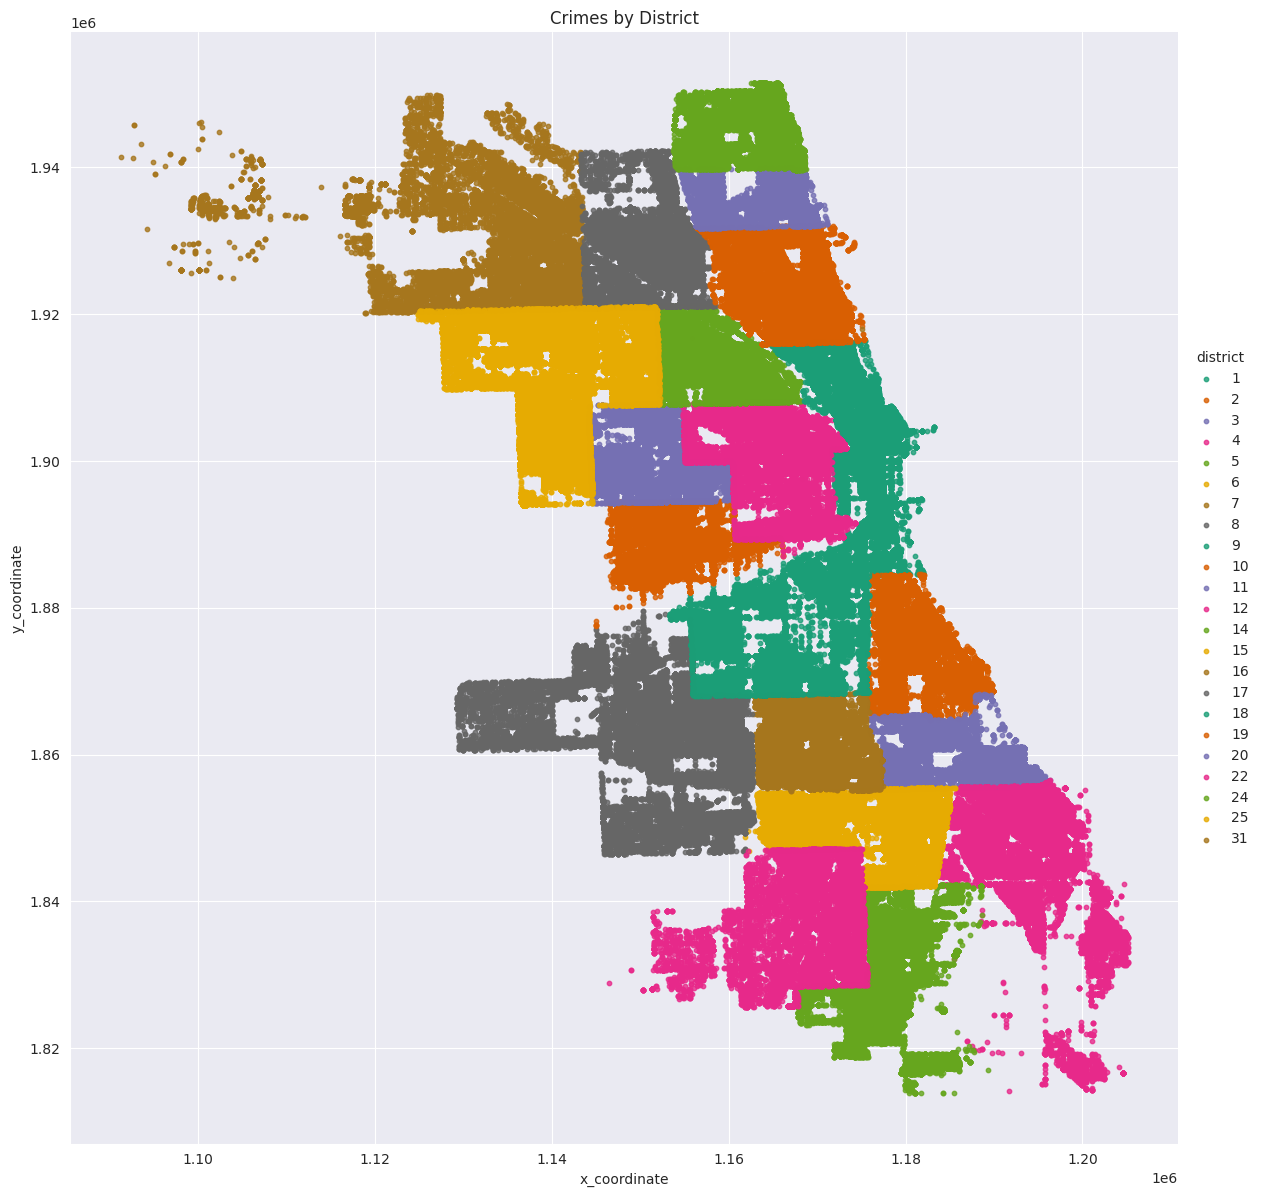

In [70]:
new_crimes_data = crimes_data.loc[(crimes_data['x_coordinate']!=0)]
sns.lmplot(x='x_coordinate',
           y='y_coordinate',
           data=new_crimes_data,
           fit_reg=False,
           hue="district",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D",
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by District")

Text(0.5, 1.0, 'Crimes by Type of crime')

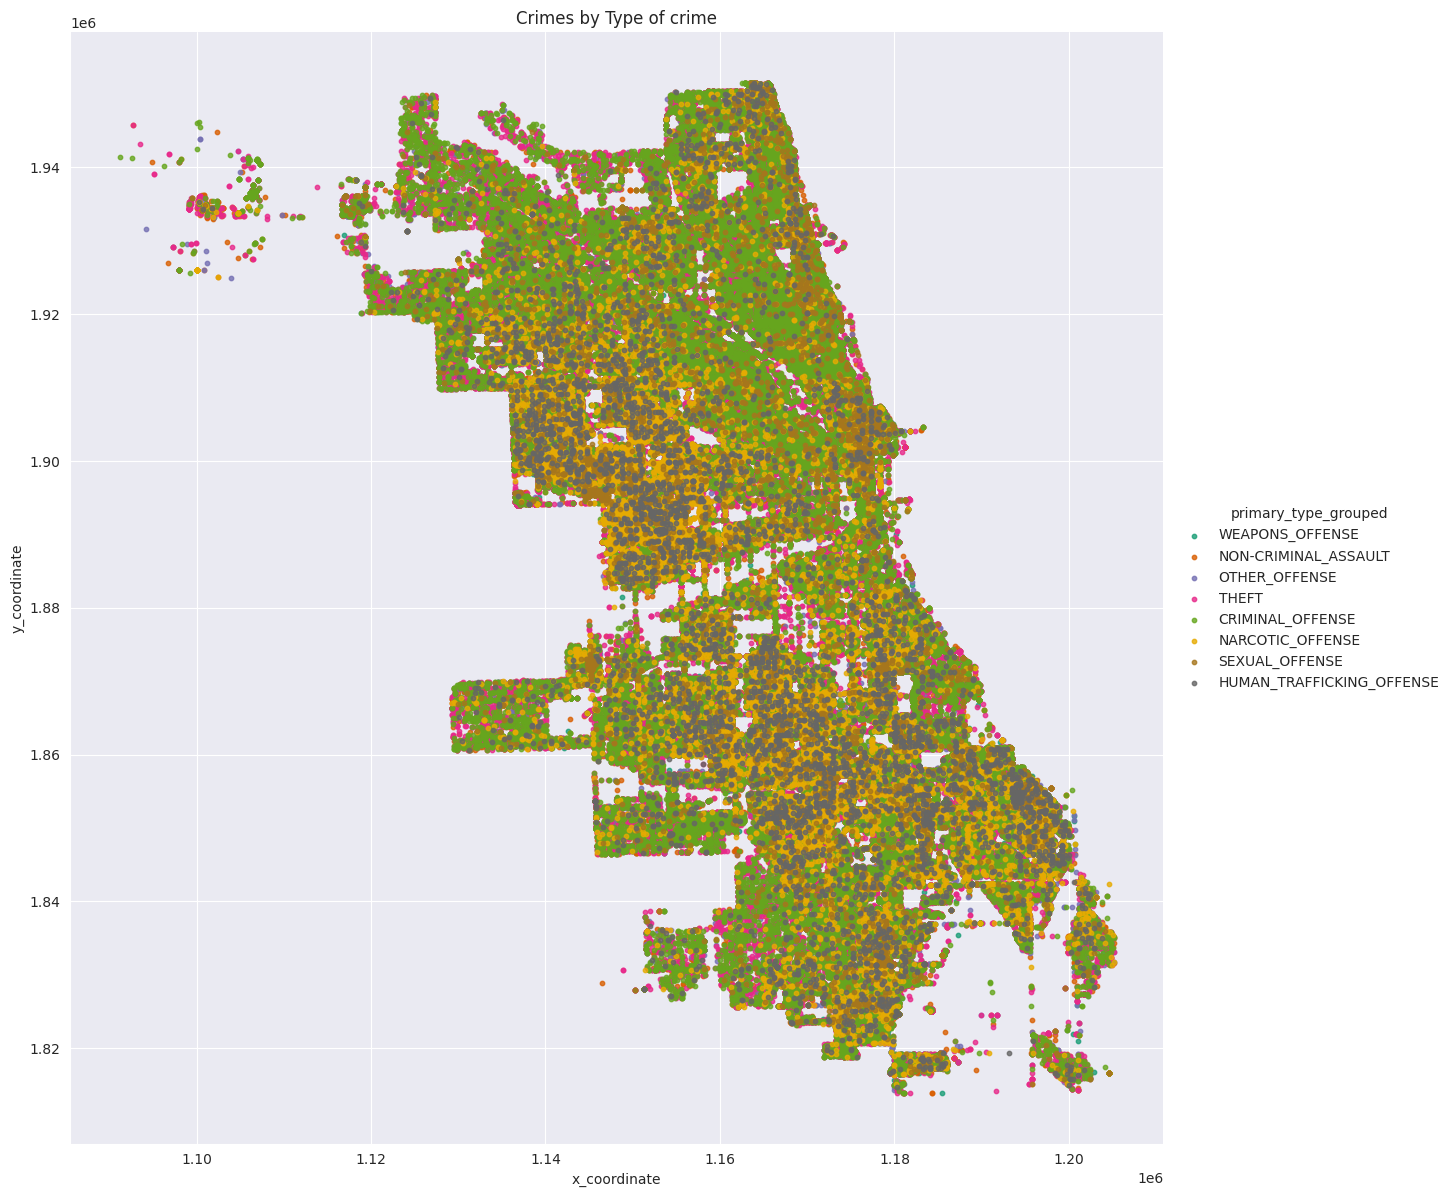

In [72]:
new_crimes_data = crimes_data.loc[(crimes_data['x_coordinate']!=0)]
sns.lmplot(x='x_coordinate',
           y='y_coordinate',
           data=new_crimes_data,
           fit_reg=False,
           hue="primary_type_grouped",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "o",
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by Type of crime")

In [73]:
#Converting the numercial attributes to categorical attributes
crimes_data.year = pd.Categorical(crimes_data.year)
crimes_data.time = pd.Categorical(crimes_data.time)
crimes_data.domestic = pd.Categorical(crimes_data.domestic)
crimes_data.arrest = pd.Categorical(crimes_data.arrest)
crimes_data.beat = pd.Categorical(crimes_data.beat)
crimes_data.district = pd.Categorical(crimes_data.district)
crimes_data.ward = pd.Categorical(crimes_data.ward)
crimes_data.community_area = pd.Categorical(crimes_data.community_area)

In [74]:
crimes_data_prediction = crimes_data.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate'],axis=1)

In [75]:
crimes_data_prediction.head()

arrest domestic  beat district  ward community_area  year   latitude  \
0      1        0   731        7   6.0           69.0  2019  41.769150   
1      0        0   724        7  16.0           68.0  2019  41.779174   
2      1        0  1533       15  29.0           25.0  2019  41.874624   
3      0        0  1133       11  28.0           27.0  2019  41.877268   
4      1        0  2232       22  34.0           73.0  2019  41.714095   

   longitude day_of_week     month time  primary_type_grouped   zone  season  \
0 -87.627137     Tuesday  December   23       WEAPONS_OFFENSE   West  Winter   
1 -87.653278     Tuesday  December   23  NON-CRIMINAL_ASSAULT  South  Winter   
2 -87.745053     Tuesday  December   23       WEAPONS_OFFENSE  South  Winter   
3 -87.711537     Tuesday  December   23       WEAPONS_OFFENSE   West  Winter   
4 -87.652807     Tuesday  December   23         OTHER_OFFENSE   West  Winter   

   loc_grouped  
0  PUBLIC_AREA  
1  PUBLIC_AREA  
2      VEHICLE  
3  PUBLIC_AREA  
4  PUBLIC_AREA

In [76]:
crimes_data_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521057 entries, 0 to 521056
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   arrest                521057 non-null  category
 1   domestic              521057 non-null  category
 2   beat                  521057 non-null  category
 3   district              521057 non-null  category
 4   ward                  521057 non-null  category
 5   community_area        521057 non-null  category
 6   year                  521057 non-null  category
 7   latitude              521057 non-null  float64 
 8   longitude             521057 non-null  float64 
 9   day_of_week           521057 non-null  object  
 10  month                 521057 non-null  object  
 11  time                  521057 non-null  category
 12  primary_type_grouped  520113 non-null  object  
 13  zone                  521057 non-null  object  
 14  season                521057 non-nul

In [77]:
crimes_data_prediction = pd.get_dummies(crimes_data_prediction,drop_first=True)

In [78]:
crimes_data_prediction.head()

latitude  longitude  arrest_1  domestic_1  beat_112  beat_113  beat_114  \
0  41.769150 -87.627137      True       False     False     False     False   
1  41.779174 -87.653278     False       False     False     False     False   
2  41.874624 -87.745053      True       False     False     False     False   
3  41.877268 -87.711537     False       False     False     False     False   
4  41.714095 -87.652807      True       False     False     False     False   

   beat_121  beat_122  beat_123  ...  season_Spring  season_Summer  \
0     False     False     False  ...          False          False   
1     False     False     False  ...          False          False   
2     False     False     False  ...          False          False   
3     False     False     False  ...          False          False   
4     False     False     False  ...          False          False   

   season_Winter  loc_grouped_GOVERNMENT  loc_grouped_OTHER  \
0           True                   False              False   
1           True                   False              False   
2           True                   False              False   
3           True                   False              False   
4           True                   False              False   

   loc_grouped_PUBLIC_AREA  loc_grouped_PUBLIC_BUILDING  \
0                     True                        False   
1                     True                        False   
2                    False                        False   
3                     True                        False   
4                     True                        False   

   loc_grouped_PUBLIC_TRANSPORTATION  loc_grouped_RESIDENCE  \
0                              False                  False   
1                              False                  False   
2                              False                  False   
3                              False                  False   
4                              False                  False   

   loc_grouped_VEHICLE  
0                False  
1                False  
2                 True  
3                False  
4                False  

[5 rows x 485 columns]

In [79]:
#Train test split with a test set size of 30% of entire data
X_train, X_test, y_train, y_test = train_test_split(crimes_data_prediction.drop(['arrest_1'],axis=1),crimes_data_prediction['arrest_1'], test_size=0.3, random_state=42)

In [80]:
#Standardizing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
# conda install scikit-learn


In [83]:
#Gaussain Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [84]:
y_pred = classifier.predict(X_test)

In [85]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[58870 64648]
 [ 7673 25127]]


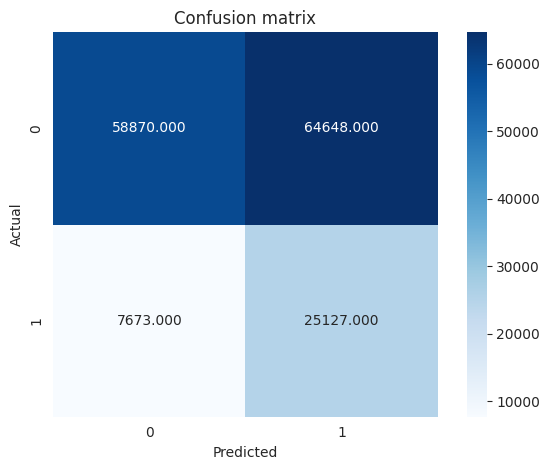

In [86]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [87]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.5373469466088359
Error =  0.46265305339116414
Precision =  0.2798886104149262
Recall =  0.7660670731707317
F-1 Score =  0.4099857230267183
Classification Report
               precision    recall  f1-score   support

       False       0.88      0.48      0.62    123518
        True       0.28      0.77      0.41     32800

    accuracy                           0.54    156318
   macro avg       0.58      0.62      0.51    156318
weighted avg       0.76      0.54      0.58    156318



In [88]:
#Decision tree with Entropy as attribute measure
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [89]:
y_pred = model.predict(X_test)

In [90]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[107966  15552]
 [ 14428  18372]]


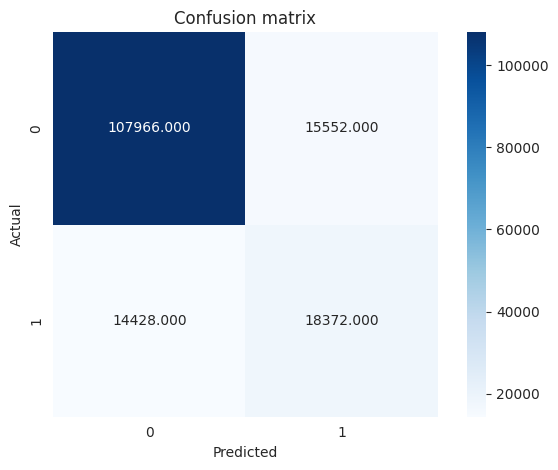

In [91]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [92]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.8082114663698359
Error =  0.19178853363016413
Precision =  0.5415634948708878
Recall =  0.5601219512195122
F-1 Score =  0.5506864096876686
Classification Report
               precision    recall  f1-score   support

       False       0.88      0.87      0.88    123518
        True       0.54      0.56      0.55     32800

    accuracy                           0.81    156318
   macro avg       0.71      0.72      0.71    156318
weighted avg       0.81      0.81      0.81    156318



In [93]:
#Random Forest classifier  - Best one
model = RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state=42)

In [94]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [95]:
y_pred = model.predict(X_test)

In [96]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[120625   2893]
 [ 18164  14636]]


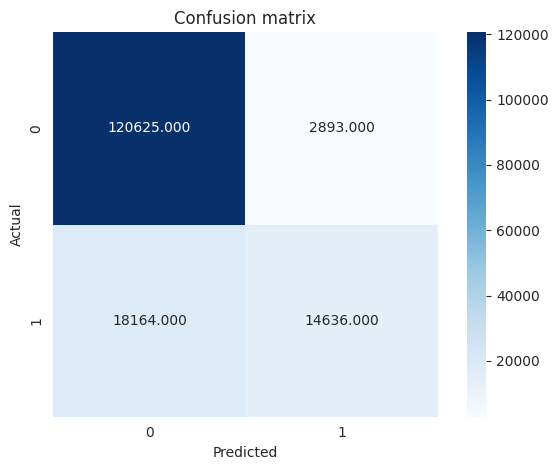

In [97]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [98]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.8652938241277396
Error =  0.13470617587226041
Precision =  0.8349592104512522
Recall =  0.44621951219512196
F-1 Score =  0.5816129865485108
Classification Report
               precision    recall  f1-score   support

       False       0.87      0.98      0.92    123518
        True       0.83      0.45      0.58     32800

    accuracy                           0.87    156318
   macro avg       0.85      0.71      0.75    156318
weighted avg       0.86      0.87      0.85    156318



In [99]:
#Logistic Regression
classifier = LogisticRegression(random_state=42)

In [100]:
classifier.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [101]:
y_pred = classifier.predict(X_test)

In [102]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[121478   2040]
 [ 21111  11689]]


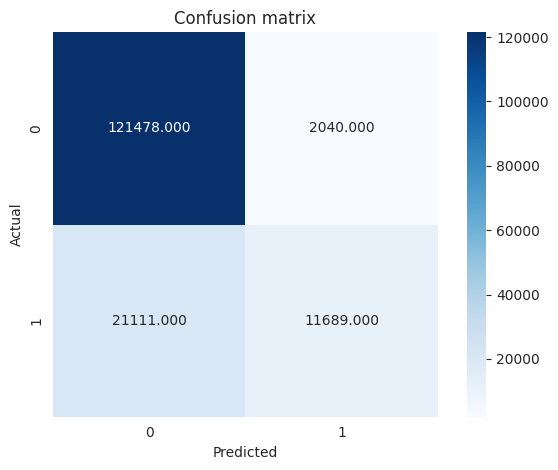

In [103]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [104]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.8518980539669136
Error =  0.14810194603308635
Precision =  0.8514094253041008
Recall =  0.3563719512195122
F-1 Score =  0.5024393389069183
Classification Report
               precision    recall  f1-score   support

       False       0.85      0.98      0.91    123518
        True       0.85      0.36      0.50     32800

    accuracy                           0.85    156318
   macro avg       0.85      0.67      0.71    156318
weighted avg       0.85      0.85      0.83    156318



In [105]:
crimes_data_type = crimes_data.loc[crimes_data.primary_type_grouped.isin(['THEFT','NON-CRIMINAL_ASSAULT','CRIMINAL_OFFENSE'])]
crimes_data_prediction = crimes_data_type.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate','primary_type_grouped'],axis=1)
crimes_data_prediction_type = crimes_data_type.primary_type_grouped
crimes_data_prediction = pd.get_dummies(crimes_data_prediction,drop_first=True)

In [106]:
crimes_data_prediction.head()

latitude  longitude  arrest_1  domestic_1  beat_112  beat_113  beat_114  \
1  41.779174 -87.653278     False       False     False     False     False   
5  41.808932 -87.641662     False       False     False     False     False   
6  41.970683 -87.712207     False       False     False     False     False   
8  41.885188 -87.630961     False       False     False     False     False   
9  41.767260 -87.575105     False        True     False     False     False   

   beat_121  beat_122  beat_123  ...  season_Spring  season_Summer  \
1     False     False     False  ...          False          False   
5     False     False     False  ...          False          False   
6     False     False     False  ...          False          False   
8     False     False     False  ...          False          False   
9     False     False     False  ...          False          False   

   season_Winter  loc_grouped_GOVERNMENT  loc_grouped_OTHER  \
1           True                   False              False   
5           True                   False              False   
6           True                   False              False   
8           True                   False              False   
9           True                   False              False   

   loc_grouped_PUBLIC_AREA  loc_grouped_PUBLIC_BUILDING  \
1                     True                        False   
5                    False                        False   
6                     True                        False   
8                     True                        False   
9                    False                        False   

   loc_grouped_PUBLIC_TRANSPORTATION  loc_grouped_RESIDENCE  \
1                              False                  False   
5                              False                   True   
6                              False                  False   
8                              False                  False   
9                              False                   True   

   loc_grouped_VEHICLE  
1                False  
5                False  
6                False  
8                False  
9                False  

[5 rows x 478 columns]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(crimes_data_prediction,crimes_data_prediction_type, test_size=0.3, random_state=42)

In [108]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
#Decision tree classifier for type of crime
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [110]:
y_pred = model.predict(X_test)

In [111]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[10539  7502 13117]
 [ 7530 23720 10665]
 [13831 10940 30343]]


In [112]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.5039668609141332
Error =  0.49603313908586677
Classification Report
                       precision    recall  f1-score   support

    CRIMINAL_OFFENSE       0.33      0.34      0.33     31158
NON-CRIMINAL_ASSAULT       0.56      0.57      0.56     41915
               THEFT       0.56      0.55      0.56     55114

            accuracy                           0.50    128187
           macro avg       0.48      0.48      0.48    128187
        weighted avg       0.51      0.50      0.50    128187



In [113]:
#Random Forest classifier for type of crime
model = RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state=42)

In [114]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [115]:
y_pred = model.predict(X_test)

In [116]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 9323  6669 15166]
 [ 4861 26372 10682]
 [10932  8571 35611]]


In [117]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.5562654559354693
Error =  0.4437345440645307
Classification Report
                       precision    recall  f1-score   support

    CRIMINAL_OFFENSE       0.37      0.30      0.33     31158
NON-CRIMINAL_ASSAULT       0.63      0.63      0.63     41915
               THEFT       0.58      0.65      0.61     55114

            accuracy                           0.56    128187
           macro avg       0.53      0.52      0.52    128187
        weighted avg       0.55      0.56      0.55    128187



In [118]:
#Logistic Regression for predicting the type of crime -Best
classifier = LogisticRegression(random_state=42)

In [119]:
classifier.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [120]:
y_pred = classifier.predict(X_test)

In [121]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 3839  4595 22724]
 [ 1691 24339 15885]
 [ 3080  3772 48262]]


In [122]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.5963163191275246
Error =  0.4036836808724754
Classification Report
                       precision    recall  f1-score   support

    CRIMINAL_OFFENSE       0.45      0.12      0.19     31158
NON-CRIMINAL_ASSAULT       0.74      0.58      0.65     41915
               THEFT       0.56      0.88      0.68     55114

            accuracy                           0.60    128187
           macro avg       0.58      0.53      0.51    128187
        weighted avg       0.59      0.60      0.55    128187



In [123]:
# Calculated the number of occrurances for each type of crime category in each district
district_crime_rates = pd.DataFrame(columns=['theft_count', 'assault_count', 'sexual_offense_count',
                                             'weapons_offense_count', 'criminal_offense_count',
                                             'human_trafficking_count', 'narcotic_offense_count',
                                             'other_offense_count'])
district_crime_rates = district_crime_rates.astype(int)

for i in range(1, 32):
    temp_district_df = crimes_data[crimes_data['district'] == i]

    temp_district_theft = temp_district_df[temp_district_df['primary_type_grouped'] == 'THEFT']
    num_theft = temp_district_theft.primary_type_grouped.count()

    temp_district_assault = temp_district_df[temp_district_df['primary_type_grouped'] == 'NON-CRIMINAL_ASSAULT']
    num_assault = temp_district_assault.primary_type_grouped.count()

    temp_district_sexual_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'SEXUAL_OFFENSE']
    num_sexual_offense = temp_district_sexual_offense.primary_type_grouped.count()

    temp_district_weapons_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'WEAPONS_OFFENSE']
    num_weapons_offense = temp_district_weapons_offense.primary_type_grouped.count()

    temp_district_criminal_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'CRIMINAL_OFFENSE']
    num_criminal_offense = temp_district_criminal_offense.primary_type_grouped.count()

    temp_district_human_trafficking = temp_district_df[temp_district_df['primary_type_grouped'] == 'HUMAN_TRAFFICKING_OFFENSE']
    num_human_trafficking = temp_district_human_trafficking.primary_type_grouped.count()

    temp_district_narcotic_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'NARCOTIC_OFFENSE']
    num_narcotic_offense = temp_district_narcotic_offense.primary_type_grouped.count()

    temp_district_other_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'OTHER_OFFENSE']
    num_other_offense = temp_district_other_offense.primary_type_grouped.count()

    district_crime_rates.loc[i] = [num_theft, num_assault, num_sexual_offense, num_weapons_offense, num_criminal_offense, num_human_trafficking, num_narcotic_offense, num_other_offense]

#district_crime_rates.head()


In [124]:
# Standardize the data
district_crime_rates_standardized = preprocessing.scale(district_crime_rates)
district_crime_rates_standardized = pd.DataFrame(district_crime_rates_standardized)
#district_crime_rates_standardized.head()

In [125]:
# Clustering with K-Means
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(district_crime_rates_standardized)
#y_kmeans

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
kmeans_clusters = list(y_kmeans1)
# Adding cluster to our data set
district_crime_rates['kmeans_cluster'] = kmeans_clusters

#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(district_crime_rates.groupby('kmeans_cluster').mean(),1))
#kmeans_mean_cluster

#district_crime_rates.head()

In [126]:
# Clustering with DBSCAN
clustering = DBSCAN(eps = 1, min_samples = 3, metric = "euclidean").fit(district_crime_rates_standardized)

# Show clusters
dbscan_clusters = clustering.labels_
# print(clusters)

district_crime_rates['dbscan_clusters'] = dbscan_clusters + 2
#district_crime_rates.head()

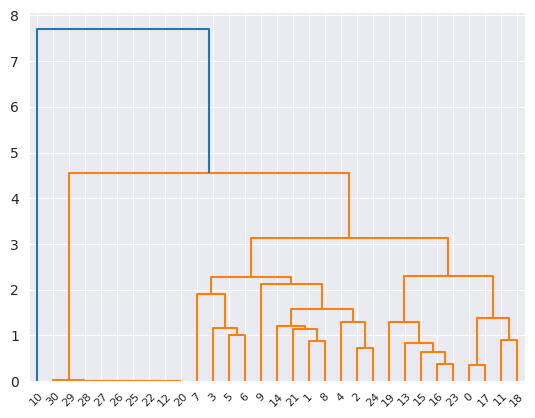

In [127]:
# Clustering with Hierarchical Clustering with average linkage
clustering = linkage(district_crime_rates_standardized, method = "average", metric = "euclidean")

# Plot dendrogram
plt.figure()
dendrogram(clustering)
plt.show()

# Form clusters
hierarchical_clusters = fcluster(clustering, 4, criterion = 'maxclust')
# print(clusters)

district_crime_rates['hierarchical_clusters'] = hierarchical_clusters
#district_crime_rates.head()

In [128]:
# Add 'district' column
district_crime_rates['district'] = district_crime_rates.index
district_crime_rates = district_crime_rates[['district', 'kmeans_cluster', 'dbscan_clusters', 'hierarchical_clusters', 'theft_count', 'assault_count', 'sexual_offense_count', 'weapons_offense_count', 'criminal_offense_count', 'human_trafficking_count', 'narcotic_offense_count', 'other_offense_count']]

In [129]:
# Remove all columns but 'district' & each method's cluster
district_crime_rates = district_crime_rates.drop(['theft_count', 'assault_count', 'sexual_offense_count', 'weapons_offense_count', 'criminal_offense_count', 'human_trafficking_count', 'narcotic_offense_count', 'other_offense_count'], axis=1)
district_crime_rates.head(31)

district  kmeans_cluster  dbscan_clusters  hierarchical_clusters
1          1               1                1                      3
2          2               1                2                      2
3          3               3                2                      2
4          4               3                1                      2
5          5               3                1                      2
6          6               3                1                      2
7          7               3                1                      2
8          8               3                1                      2
9          9               1                2                      2
10        10               3                1                      2
11        11               4                1                      4
12        12               1                1                      3
13        13               2                3                      1
14        14               1                4                      3
15        15               1                1                      2
16        16               1                4                      3
17        17               1                4                      3
18        18               1                1                      3
19        19               1                1                      3
20        20               2                4                      3
21        21               2                3                      1
22        22               1                4                      2
23        23               2                3                      1
24        24               1                4                      3
25        25               3                2                      2
26        26               2                3                      1
27        27               2                3                      1
28        28               2                3                      1
29        29               2                3                      1
30        30               2                3                      1
31        31               2                3                      1

In [130]:
# Merge each district's clusters for each method into a single dataframe
crimes_data_clustered = pd.merge(crimes_data, district_crime_rates, on='district', how='inner')
#crimes_data.head()

Text(0.5, 1.0, 'KMeans Clustering of Crimes by District')

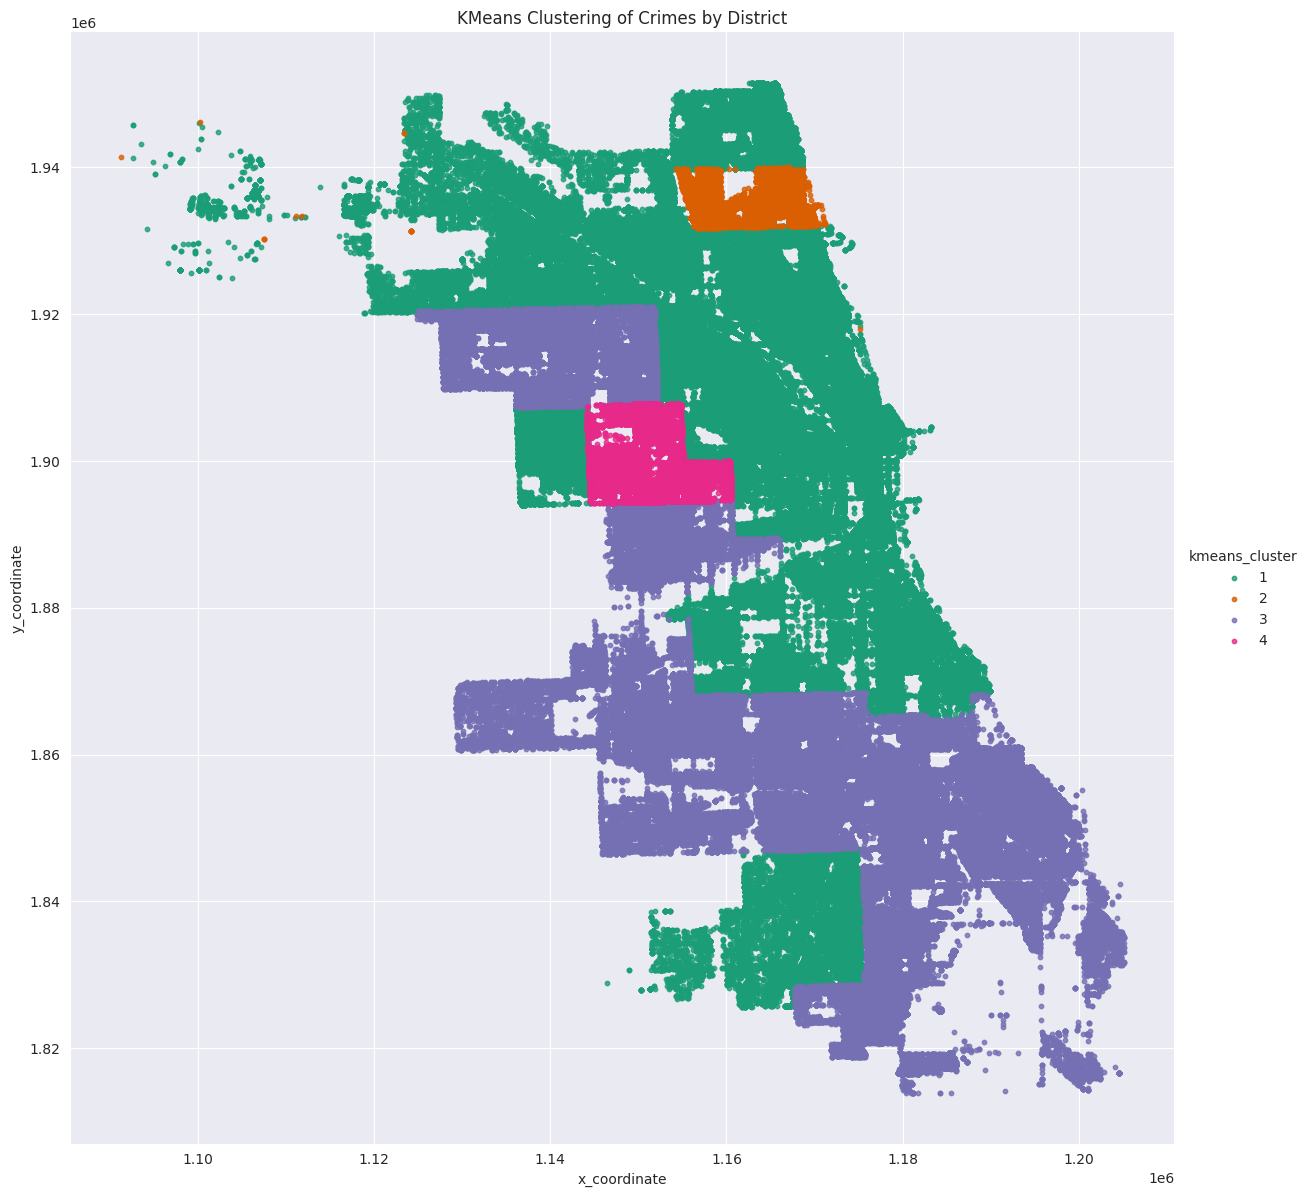

In [132]:
# Crime level clusters by district (KMeans Clustering)
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['x_coordinate']!=0)]
sns.lmplot(x='x_coordinate',
           y='y_coordinate',
           data=new_crimes_data,
           fit_reg=False,
           hue="kmeans_cluster",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D",
                        "s": 10})
ax = plt.gca()
ax.set_title("KMeans Clustering of Crimes by District")

Text(0.5, 1.0, 'DBScan Clustering of Crimes by District')

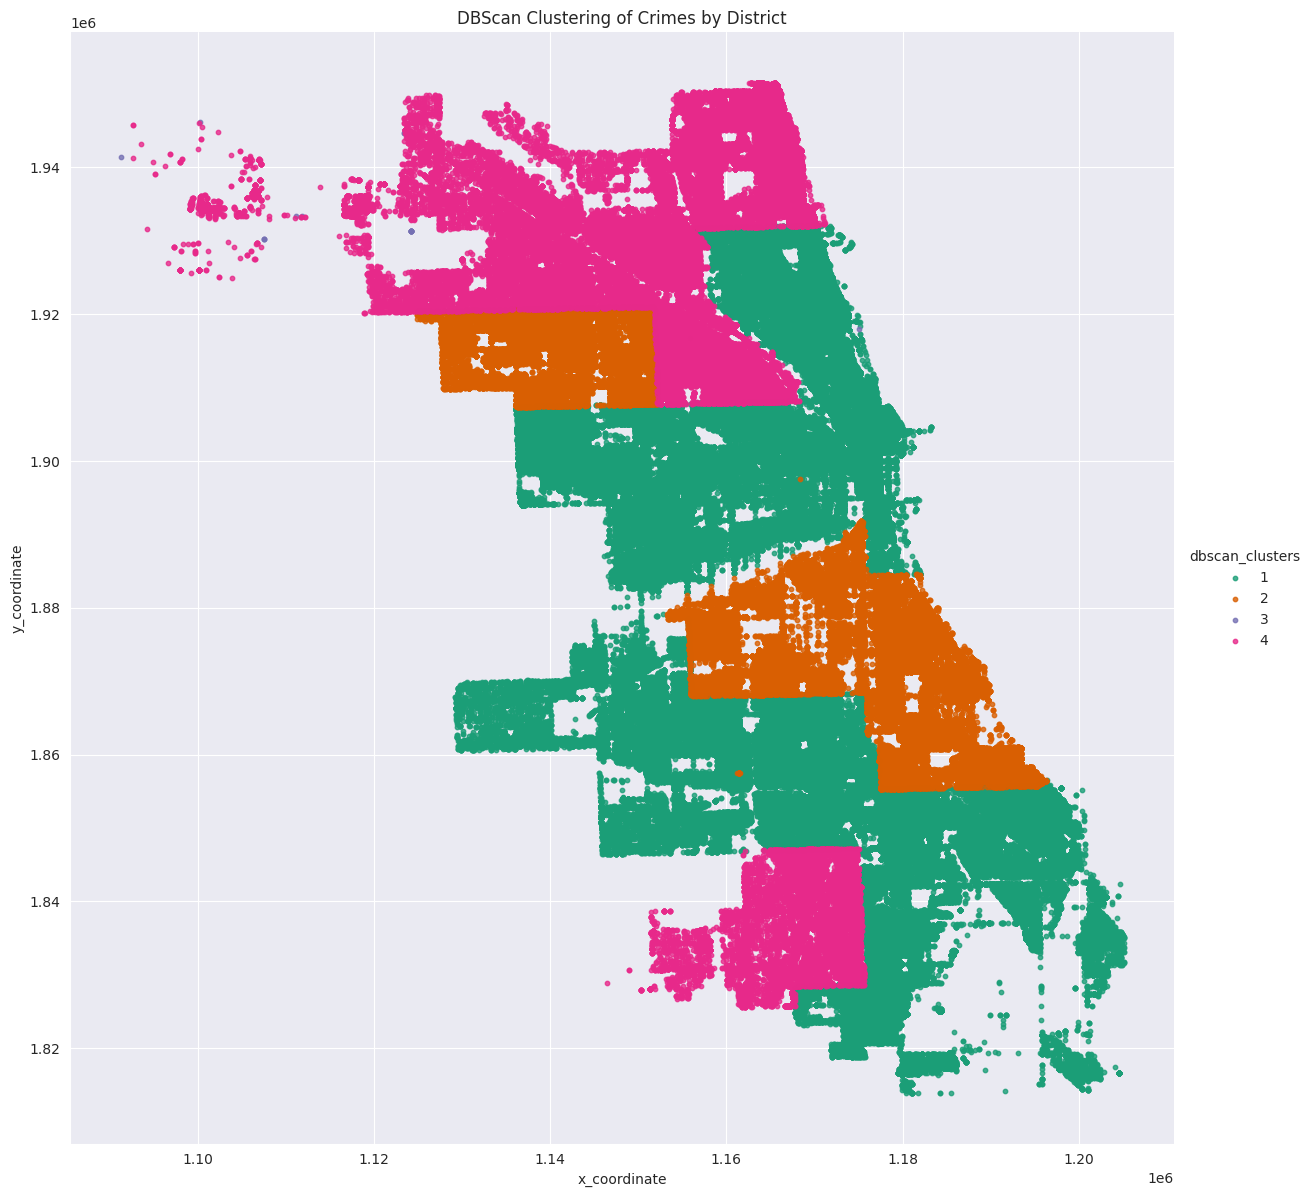

In [133]:
# Crime level clusters by district (DBScan Clustering)
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['x_coordinate']!=0)]
sns.lmplot(x='x_coordinate',
           y='y_coordinate',
           data=new_crimes_data,
           fit_reg=False,
           hue="dbscan_clusters",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D",
                        "s": 10})
ax = plt.gca()
ax.set_title("DBScan Clustering of Crimes by District")

Text(0.5, 1.0, 'Hierarchical Clustering of Crimes by District')

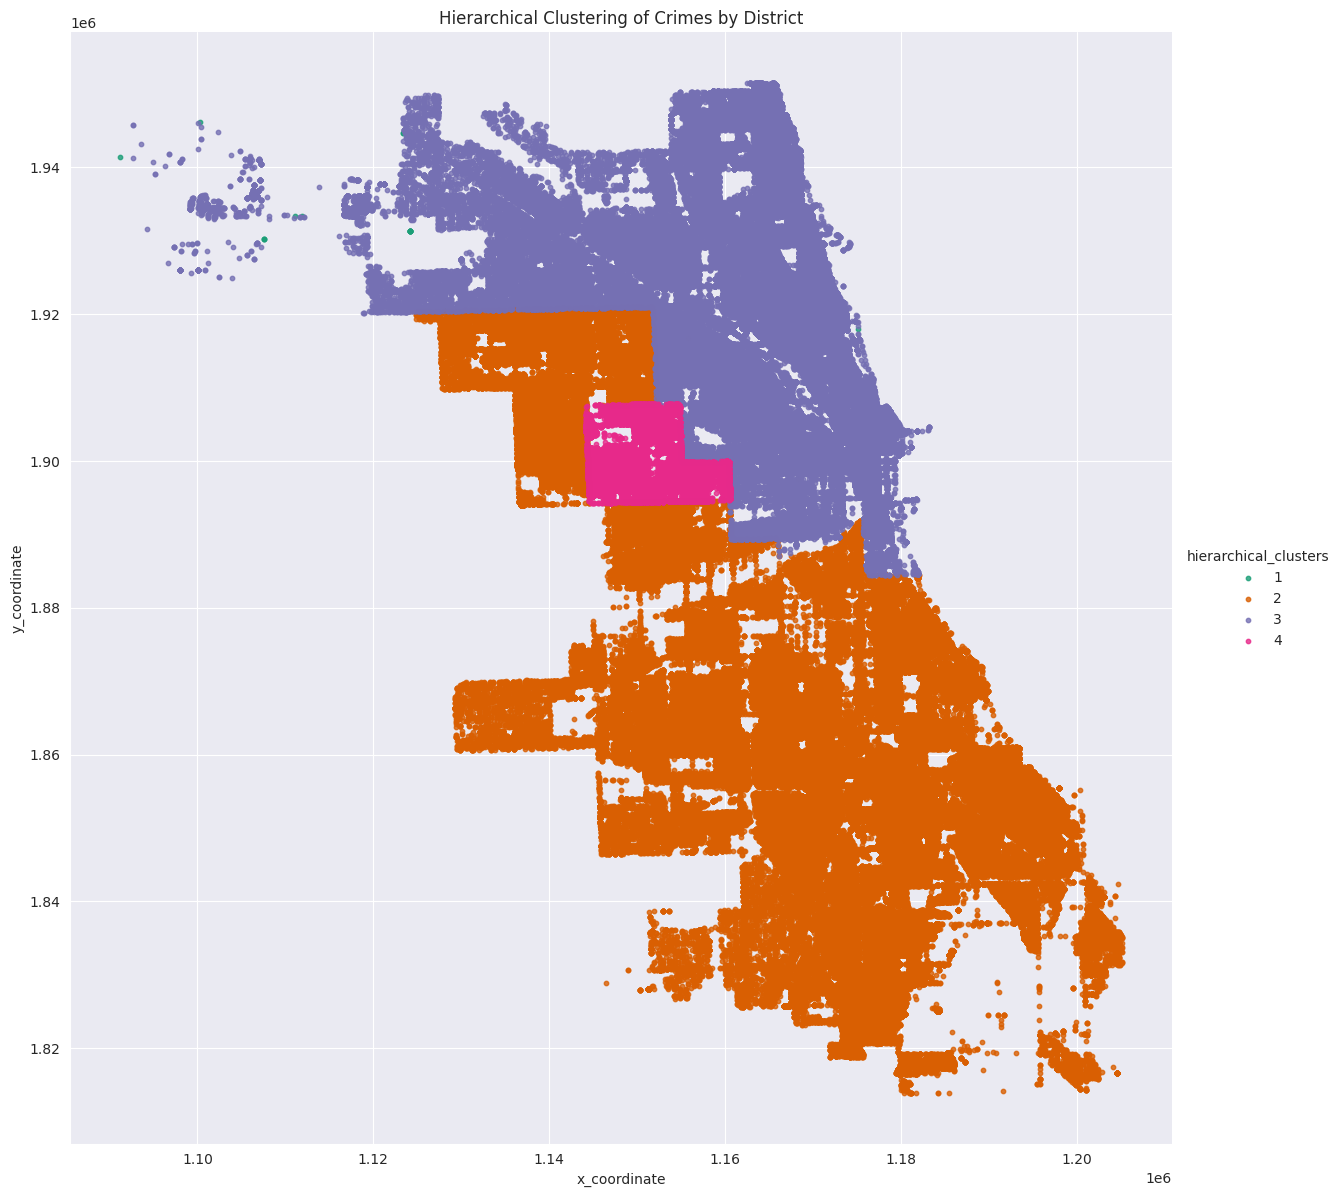

In [134]:
# Crime level clusters by district (Hierarchical Clustering)
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['x_coordinate']!=0)]
sns.lmplot(x='x_coordinate',
           y='y_coordinate',
           data=new_crimes_data,
           fit_reg=False,
           hue="hierarchical_clusters",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D",
                        "s": 10})
ax = plt.gca()
ax.set_title("Hierarchical Clustering of Crimes by District")

Finally, we can conclude that by analyzing the crime data using different data science models, we see that the South and West zones are more prone to crimes than the East and North Zones, Also a lot of theft related incidents are happening within the city which, the chances of the criminal being arrested for high profiles crimes like narcotics and sexual offence is high whereas for the battery and robbery related crimes very few criminals are arrested.

By deploying suitable forces within the Residential and Public areas around the South and West zones of the city in the summer and spring months, the number of crimes can possibly be reduced.